In [ ]:
# Imports
library(Seurat)
library(ggplot2)
library(decoupleR)
library(stringr) 
library(gridExtra)
library(dplyr)
library(tibble)
library(tidyr)
library(patchwork)
library(ggplot2)
library(pheatmap)
library(clusterProfiler)
library(fgsea)
library(msigdbr)
library(homologene)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=18, repr.plot.height=18)

# Read macrophage data of mouse
macrophages <- readRDS("../../../data/R Objects/Macrophage R Objects/all_mice_macrophage_data_annotatedv2.rds")

Warning message:
"package 'Seurat' was built under R version 4.4.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.4.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'stringr' was built under R version 4.4.2"
Warning message:
"package 'gridExtra' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tibble' was built under R version 4.4

In [ ]:
# Define custom colors
colors = c("#A7C9E7", "#55D6BE", "#006494", "#549cba", "#1B98E0")

In [2]:
# Transcription factor analysis
collectri_dataset <- decoupleR::get_collectri(organism = 'mouse', 
                                split_complexes = FALSE)

# Extract the normalized log-transformed counts
data_matrix <- as.matrix(macrophages@assays$RNA["data"])

# Run ulm
acts <- decoupleR::run_ulm(mat = data_matrix, 
                           net = collectri_dataset, 
                           .source = 'source', 
                           .target = 'target',
                           .mor='mor', 
                           minsize = 5)

acts

statistic,source,condition,score,p_value
<chr>,<chr>,<chr>,<dbl>,<dbl>
ulm,Abl1,HFD 10/11_AAACCTGGTTCACCTC-1,7.0612763,1.684908e-12
ulm,Abl1,HFD 10/11_AAACCTGTCTTGCCGT-1,6.6566126,2.849320e-11
ulm,Abl1,HFD 10/11_AAAGATGTCCCAAGAT-1,9.5710678,1.134532e-21
ulm,Abl1,HFD 10/11_AAAGCAACAGCGTAAG-1,1.1865136,2.354287e-01
ulm,Abl1,HFD 10/11_AAAGCAACATGCAATC-1,4.1505892,3.325153e-05
ulm,Abl1,HFD 10/11_AAAGCAATCTTATCTG-1,1.3459437,1.783306e-01
ulm,Abl1,HFD 10/11_AAAGTAGGTGCCTGCA-1,7.3442126,2.121214e-13
ulm,Abl1,HFD 10/11_AACCATGCACGGATAG-1,6.2681439,3.702358e-10
ulm,Abl1,HFD 10/11_AACCATGTCTCGCTTG-1,4.5577179,5.191189e-06


In [ ]:
# Extract ulm
macrophages[['tfsulm']] <- acts %>%
  pivot_wider(id_cols = 'source', names_from = 'condition', #condition = seurat_clusters / cell type
              values_from = 'score') %>%
  column_to_rownames('source') %>%
  Seurat::CreateAssayObject(.)

# Change assay
DefaultAssay(object = macrophages) <- "tfsulm"

# Scale the data
macrophages <- ScaleData(macrophages)
macrophages@assays$tfsulm["data"] <- macrophages@assays$tfsulm@scale.data

Centering and scaling data matrix



`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.


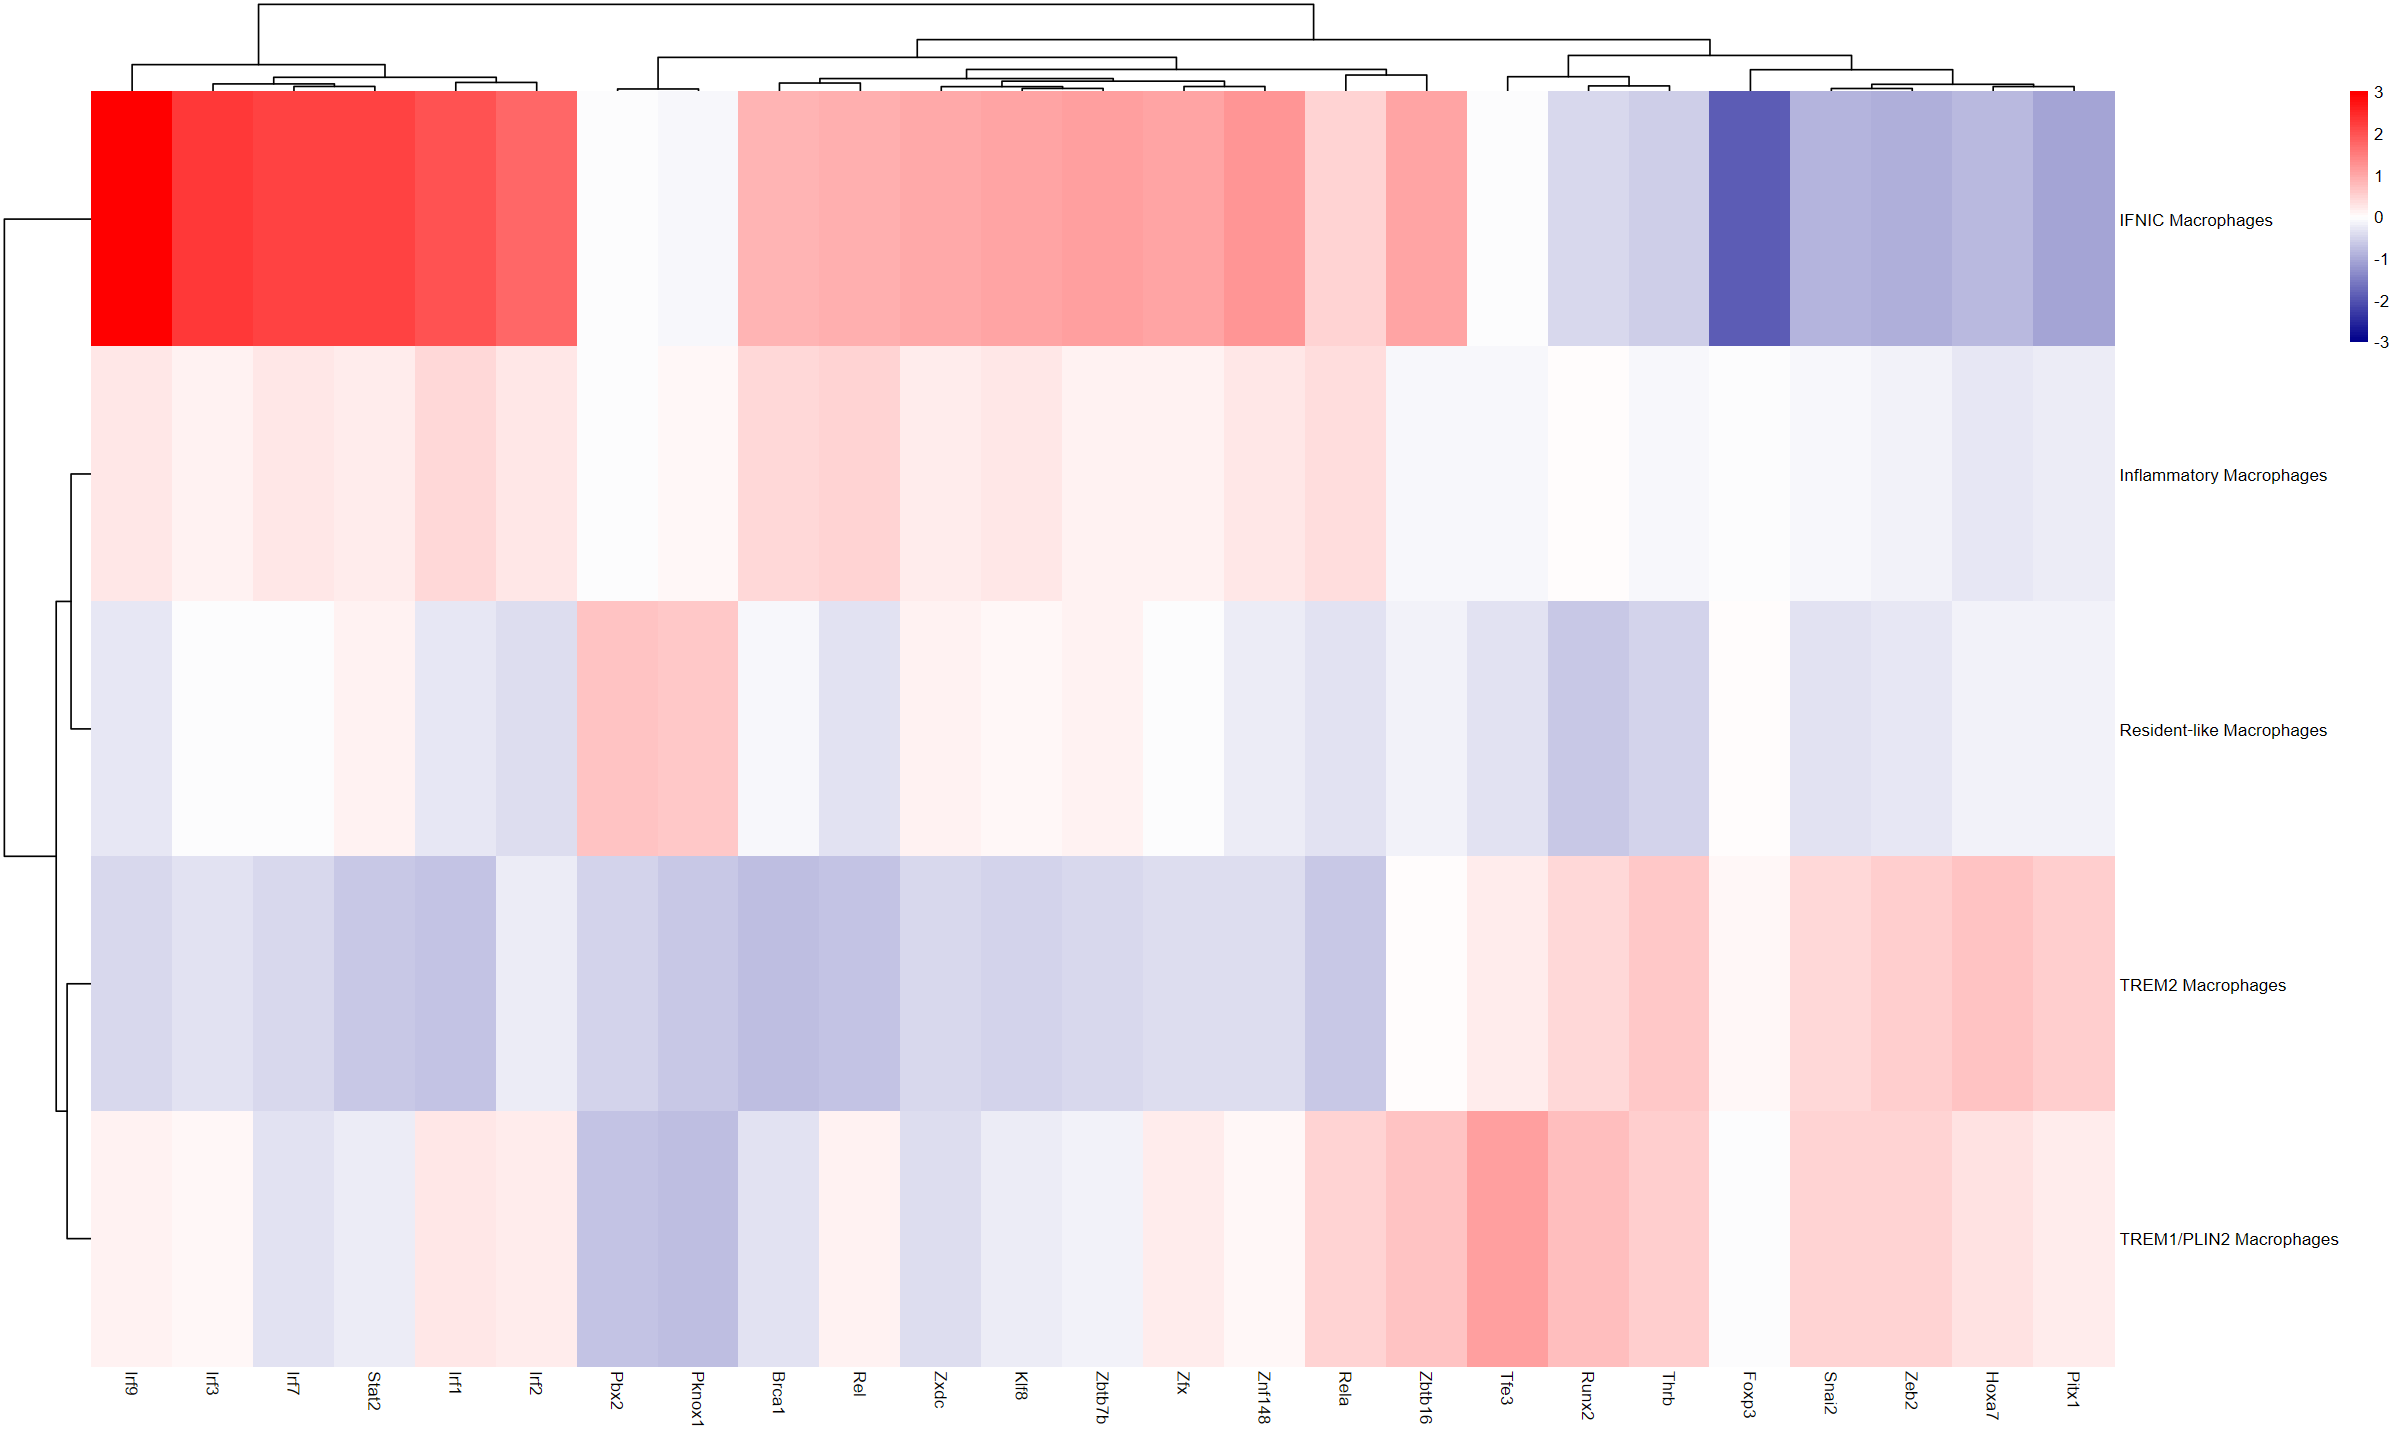

In [ ]:
# Set number of  tfs
n_tfs <- 25

# Extract tfs as dataframe
df <- t(as.matrix(macrophages@assays$tfsulm["data"])) %>%
  as.data.frame() %>%
  mutate(cluster = Idents(macrophages)) %>%
  pivot_longer(cols = -cluster, names_to = "source", values_to = "score") %>%
  group_by(cluster, source) %>%
  summarise(mean = mean(score))

# Get top tfs
tfs <- df %>%
  group_by(source) %>%
  summarise(std = sd(mean)) %>%
  arrange(-abs(std)) %>%
  head(n_tfs) %>%
  pull(source)

# Subset dataframe to top tfs
top_acts_mat <- df %>%
  filter(source %in% tfs) %>%
  pivot_wider(id_cols = 'cluster', names_from = 'source',
              values_from = 'mean') %>%
  column_to_rownames('cluster') %>%
  as.matrix()

# Choose colors
palette_length = 100
my_color = colorRampPalette(c("Darkblue", "white", "red"))(palette_length)

my_breaks <- c(seq(-3, 0, length.out=ceiling(palette_length/2) + 1),
               seq(0.05, 3, length.out=floor(palette_length/2)))

# Plot heatmap of tfs
pheatmap(top_acts_mat, border_color = NA, color=my_color, breaks = my_breaks) 

Warning message in DoHeatmap(macrophages, features = genes$mouseGene, size = 1, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Frmd4b, Fuca1, Dab2, Lgmn, Adm, Bnip3, Tmem158, Slc2a3, Clec5a, Tesc, Tmem154, Pram1, Cd1d1, Clec12a, Rab24, Tnfsf10, Cd59b, C1qb, A2m, C1qc, Cd81"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


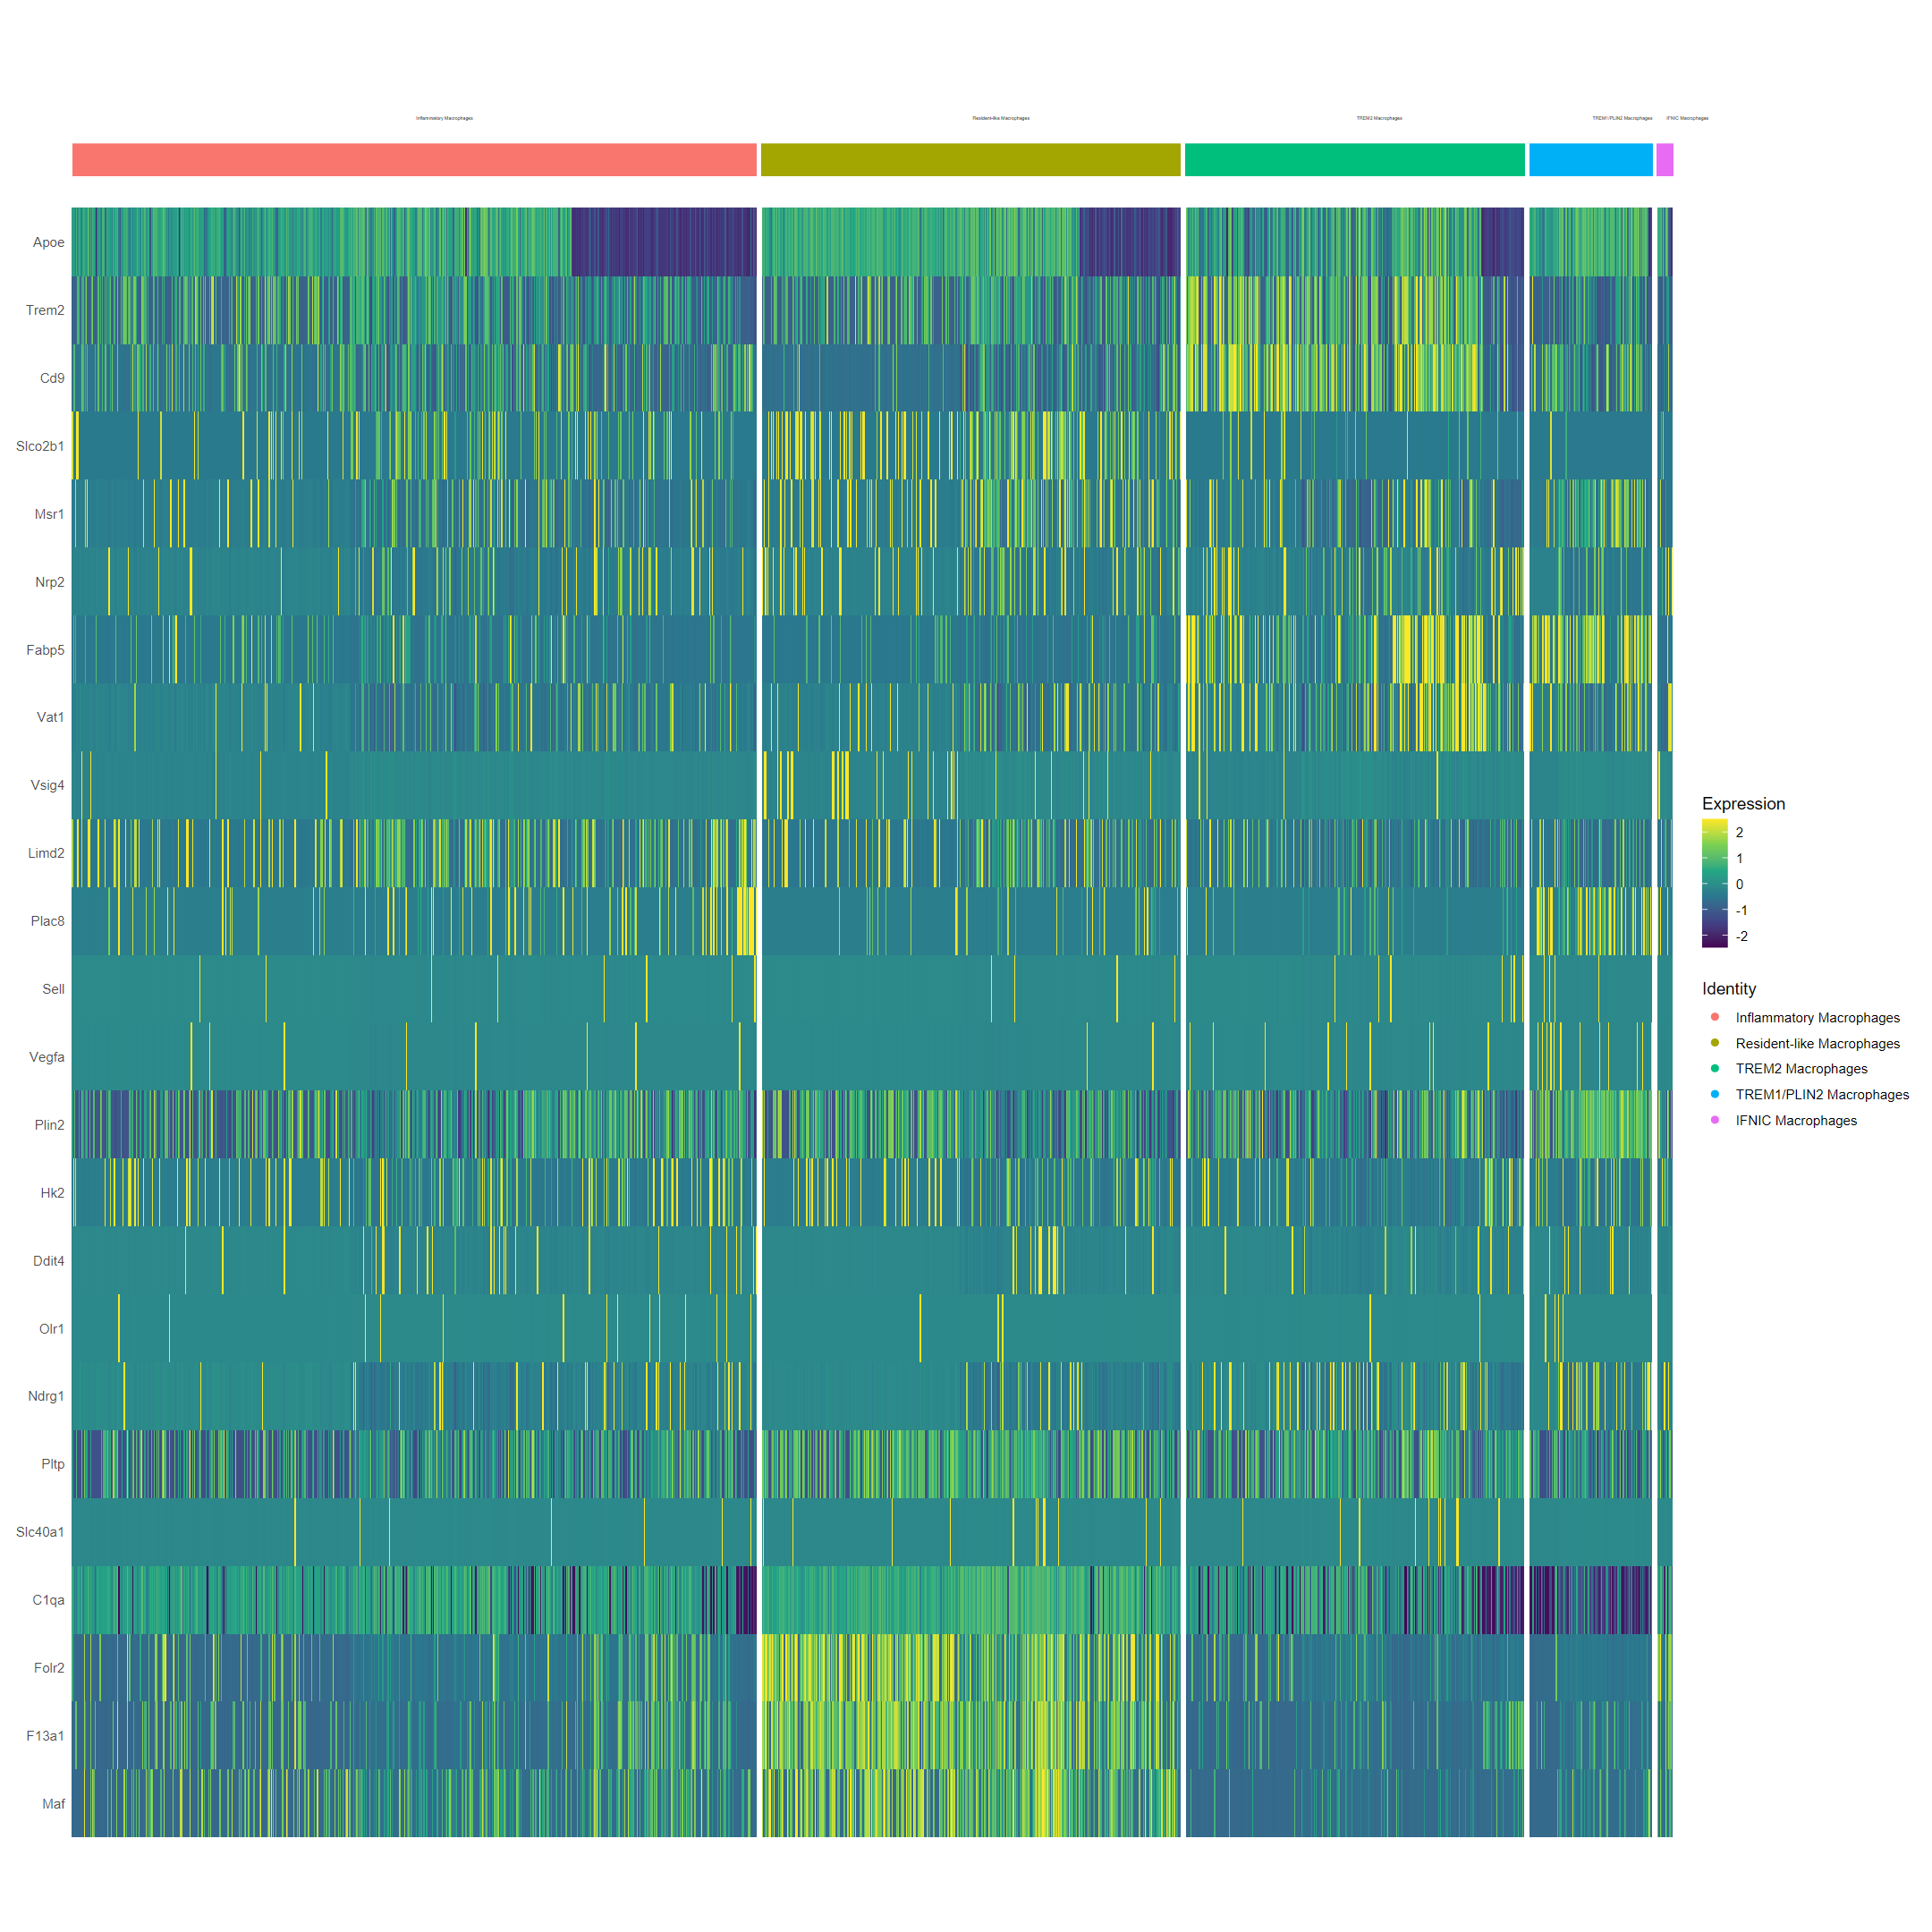

In [ ]:
# Heatmap with Koen markers
genes <- c("APOE", "CD81", "TREM2", "C1QC", "CD9", "A2M", "APOC1", "C1QB", "SLCO2B1", "MSR1", 
           "CD59", "NRP2", "FABP5", "VAT1", "VSIG4", "JAML", "LIMD2", "TNFSF10", "RIPOR2", "RAB24", "PLAC8", 
           "ICAM3", "CLEC12A", "C19ORF38", "SELL", "IFITM1", "CD1D", "PRAM1", "TMEM154", "TESC", 
           "C15ORF48", "VEGFA", "PLIN2", "CLEC5A", "HIF1A-AS3", "TNFS1", "ERO1A", "HK2", 
           "SLC2A3", "DDIT4", "TMEM158", "OLR1", "NDRG1", "BNIP3", "ADM", "SELENOP", "PLTP", 
           "SLC40A1", "C1QA", "CCL18", "ILILRB5", "FOLR2", "LGMN", "F13A1", "DAB2", "FUCA1", 
           "MAF", "FRMD4B")

# Convert genes to mouse homologs 
genes <- human2mouse(genes, db = homologene::homologeneData)

# Plot heatmap of marker genes
heatmap_markergenes <- DoHeatmap(macrophages, features = genes$mouseGene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")
heatmap_markergenes

In [ ]:
# Find all markers
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster Inflammatory Macrophages



Calculating cluster Resident-like Macrophages

Calculating cluster TREM2 Macrophages

Calculating cluster TREM1/PLIN2 Macrophages

Calculating cluster IFNIC Macrophages



Warning message in DoHeatmap(macrophages, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tmem38b"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


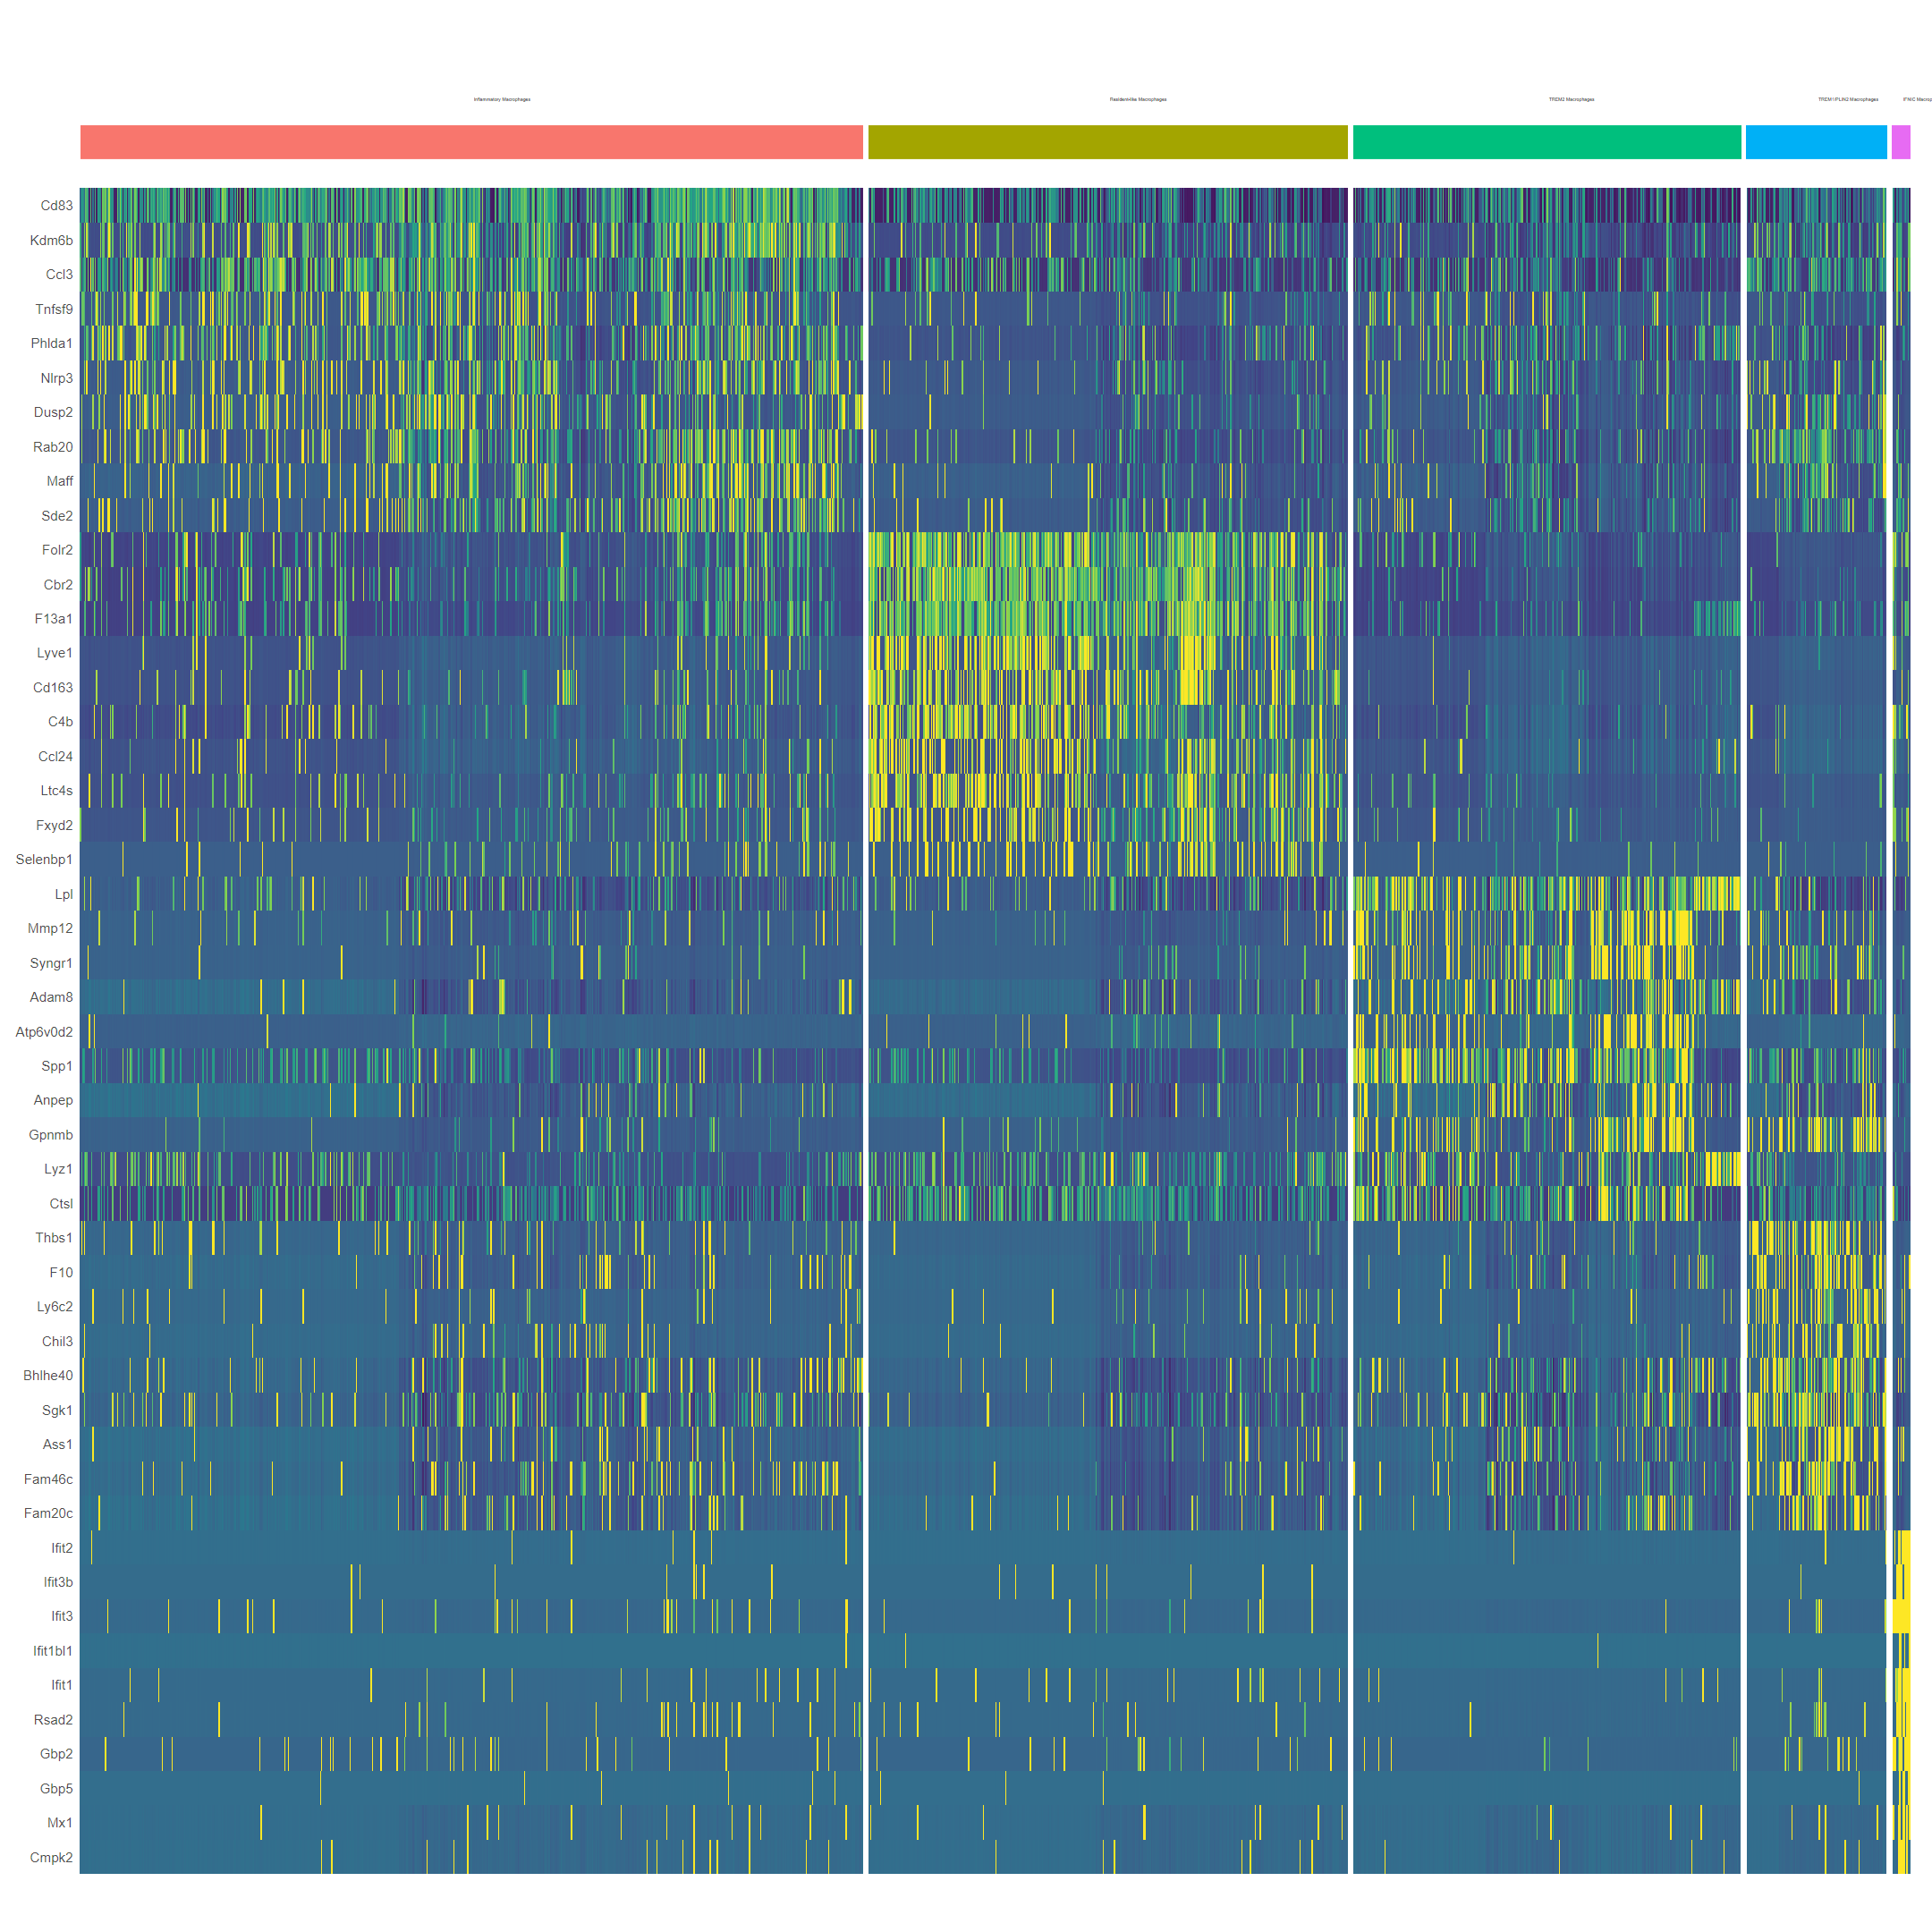

In [ ]:
# Create heatmap of markers
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
heatmap_markergenes <- DoHeatmap(macrophages, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white") & theme(legend.position =  "none")
heatmap_markergenes

In [14]:
# Define custom colors
colors = c("#A7C9E7", "#55D6BE", "#006494", "#549cba", "#1B98E0")

In [116]:
# Some marker genes according to Winther & Willemsen
features_inflammatory <- c("S100a8", "S100a9", "Il1b", "Casp1", "Casp4", "Nlrp3")
features_resident <- c("Lyve1", "Cx3cr1", "Folr2", "C1qa", "C1qb", "C1qc", "Cd74")  #, "Hla-dra", "Hla-drb1") Dit zijn menselijke genen, ortholoog staat niet tussen features
features_trem2 <- c("Trem2", "Cd9", "Fabp5", "Apoe", "Apoc1")
features_ifnic <- c("Isg15", "Irf7", "Ifit3", "Ifit1")
features_proliferating <- c("Stmn1", "Top2a", "Mki67", "Tuba1b", "Tubb5")
features_ILAM <- c("Vegfa", "Plin2", "Trem1", "Clec5a", "Anpep") #, "S100a12"

# Add a module score to the Seurat object
macrophages <- AddModuleScore(macrophages, features = list(features_inflammatory), name = "FeatureGeneScore_inflammatory")
macrophages <- AddModuleScore(macrophages, features = list(features_resident), name = "FeatureGeneScore_resident_like")
macrophages <- AddModuleScore(macrophages, features = list(features_trem2), name = "FeatureGeneScore_trem2")
macrophages <- AddModuleScore(macrophages, features = list(features_ifnic), name = "FeatureGeneScore_ifnic")
macrophages <- AddModuleScore(macrophages, features = list(features_proliferating), name = "FeatureGeneScore_proliferating")
macrophages <- AddModuleScore(macrophages, features = list(features_ILAM), name = "FeatureGeneScore_ilam")


# Vln plots
inflammatory_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_inflammatory1", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores Inflammatory macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )

residents_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_resident_like1", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores Resident-like Macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )
trem2_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_trem21", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores TREM2 Macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )
ifn_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_ifnic1", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores IFNIC Macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )
proliferating_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_proliferating1", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores Proliferating Macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )
ilam_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_ilam1", pt.size=0, cols = colors) + 
  ggtitle("FeatureGeneScores TREM1/ PLIN2 Macrophages") + theme_minimal() + # Use a clean minimal theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14), # Center and bold the title
      axis.text.x = element_text(angle = 30, hjust = 0.5), 
      axis.title.x = element_blank(), 
      legend.position = "none" # Remove legend
    )
  
# Visualizing DotPlots to view marker genes
inflammatory_dot <- DotPlot(macrophages, features = features_inflammatory) + 
  ggtitle("Inflammatory Macrophages") + RotatedAxis()

resident_dot <- DotPlot(macrophages, features = features_resident) + 
  ggtitle("Resident-Like Macrophages")

TREM2_dot <- DotPlot(macrophages, features = features_trem2) + 
  ggtitle("TREM2 'Foamy' Macrophages")

IFNIC_dot <- DotPlot(macrophages, features = features_ifnic) + 
  ggtitle("IFNIC Macrophages")

proliferating_dot <- DotPlot(macrophages, features = features_proliferating) + 
  ggtitle("Proliferating Macrophages")

ilam_dot <- DotPlot(macrophages, features = features_ILAM) + 
  ggtitle("PLIN2 / TREM1 Macrophages")

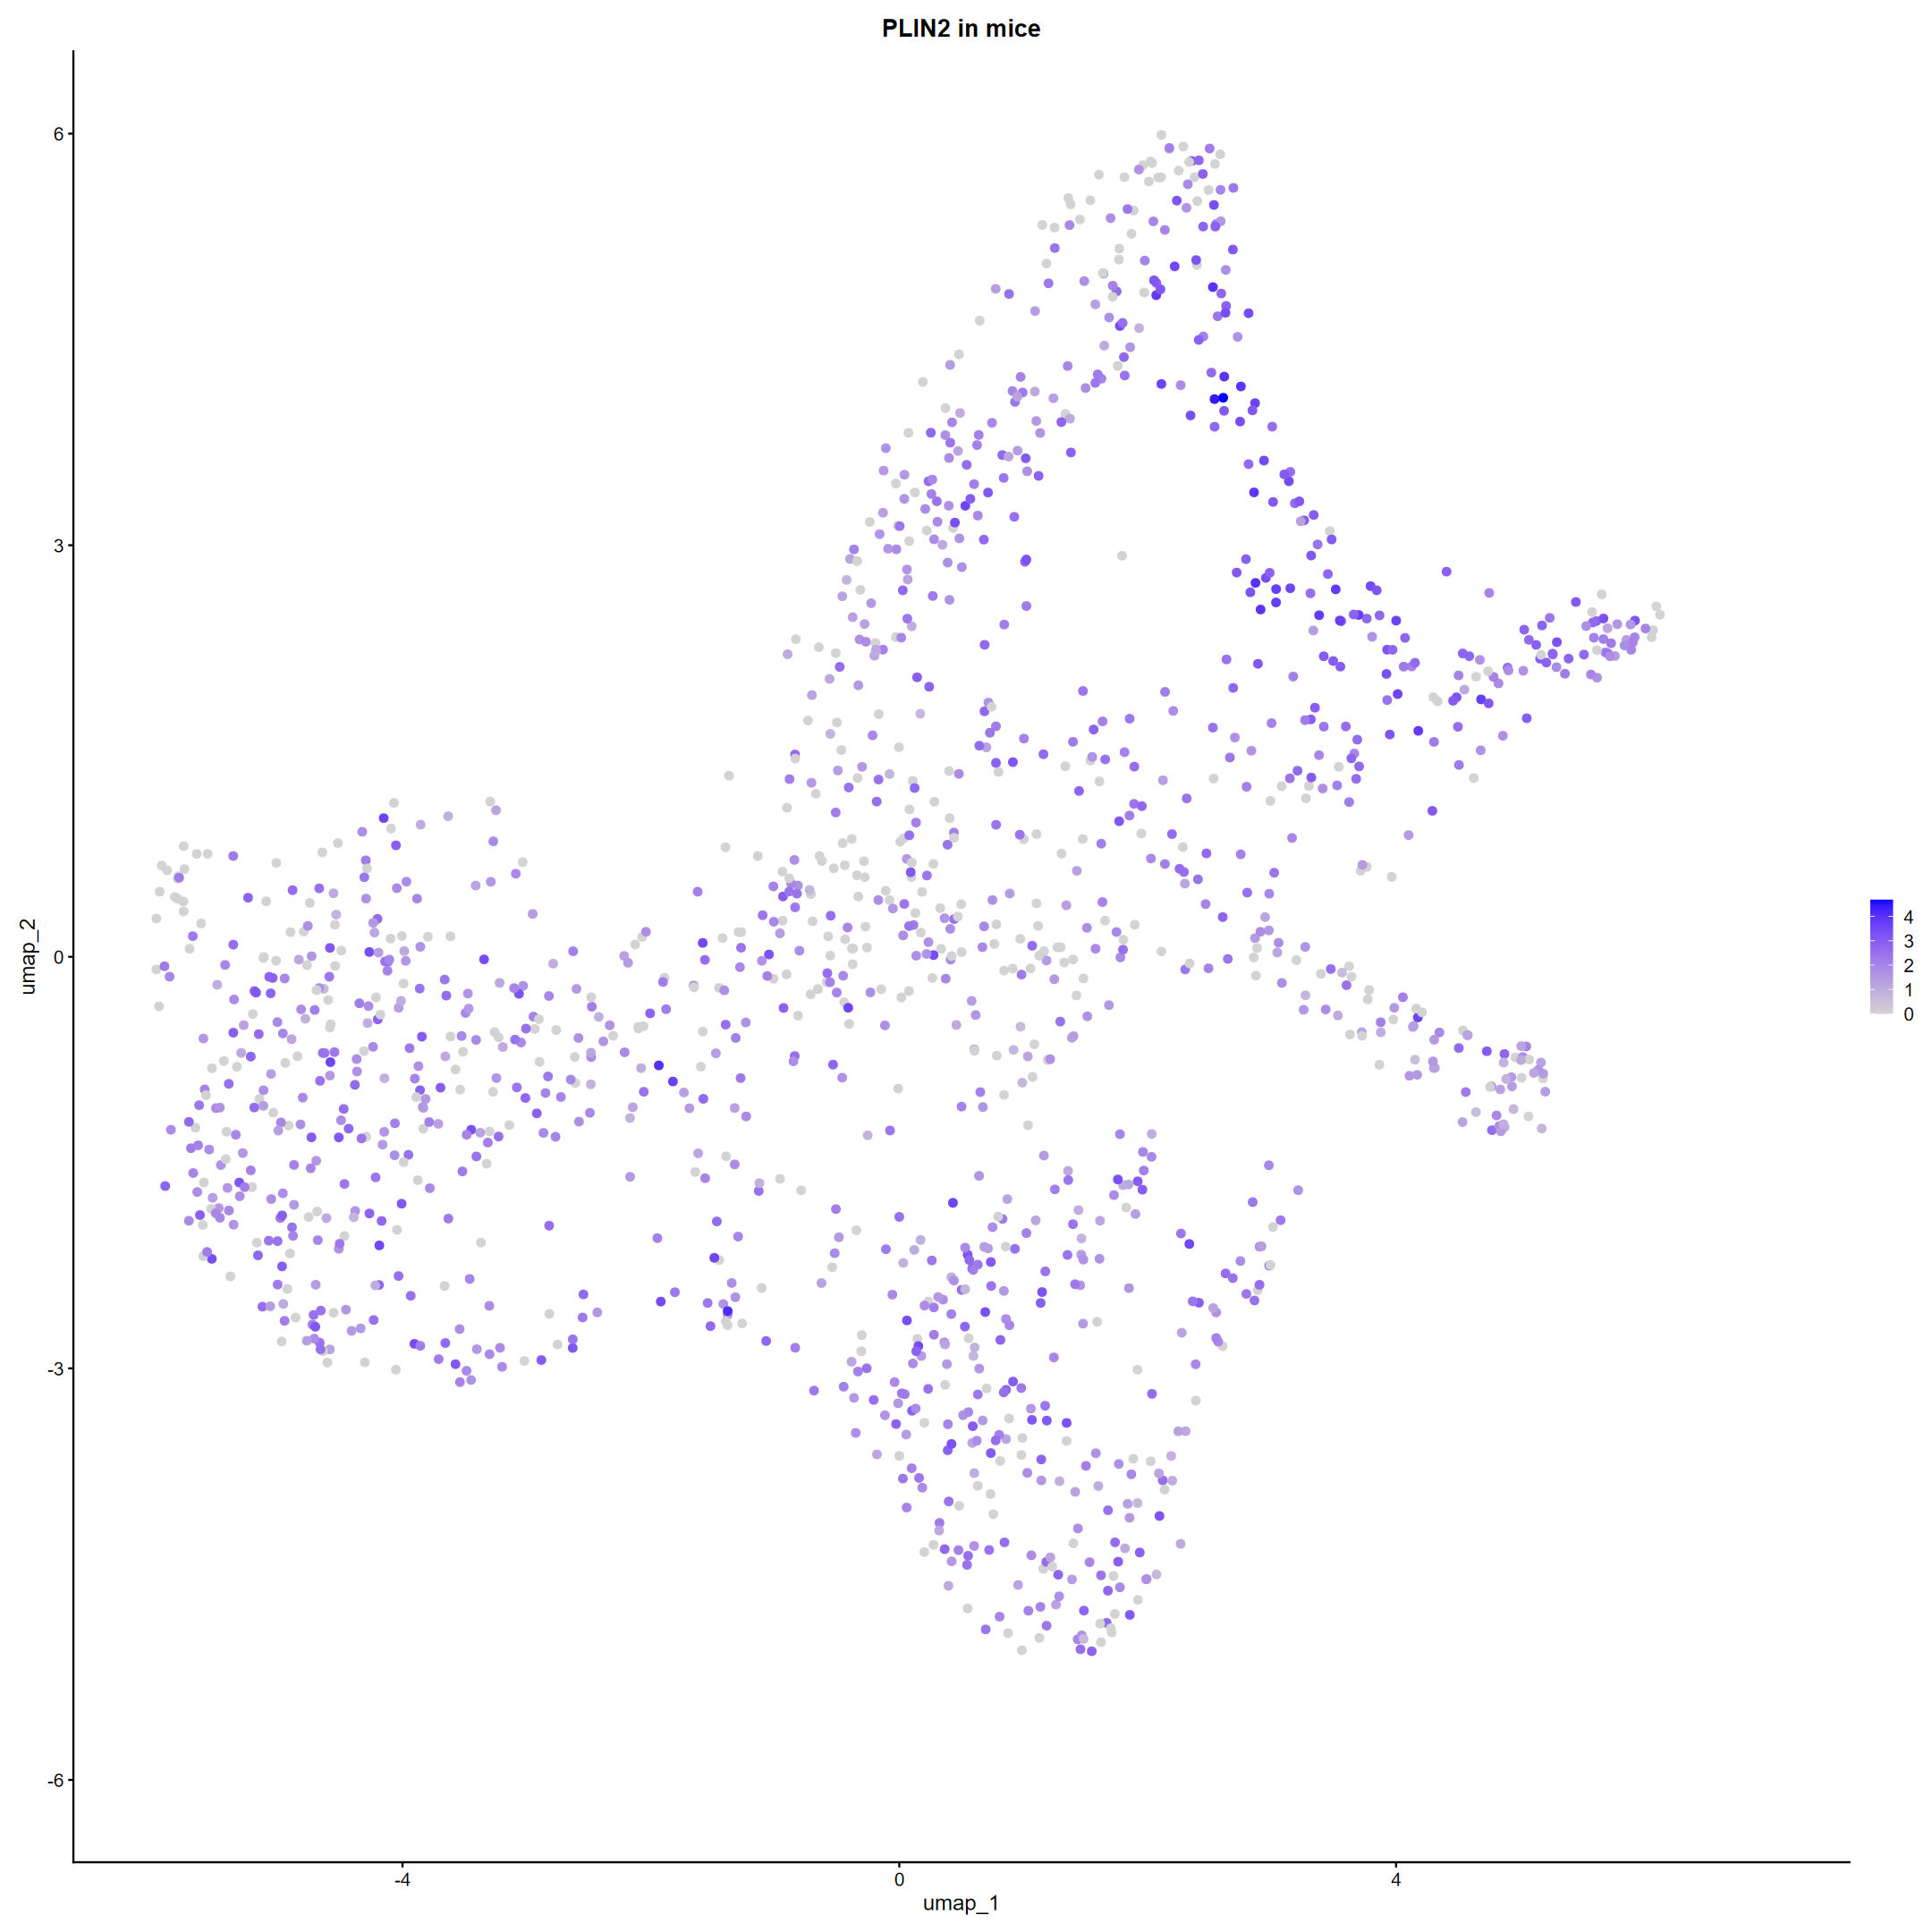

: 

In [ ]:
# Featureplot of Plin2
FeaturePlot(macrophages, reduction = "umap", features = "Plin2", ncol = 1, pt.size = 2) + ggtitle("PLIN2 in mice")

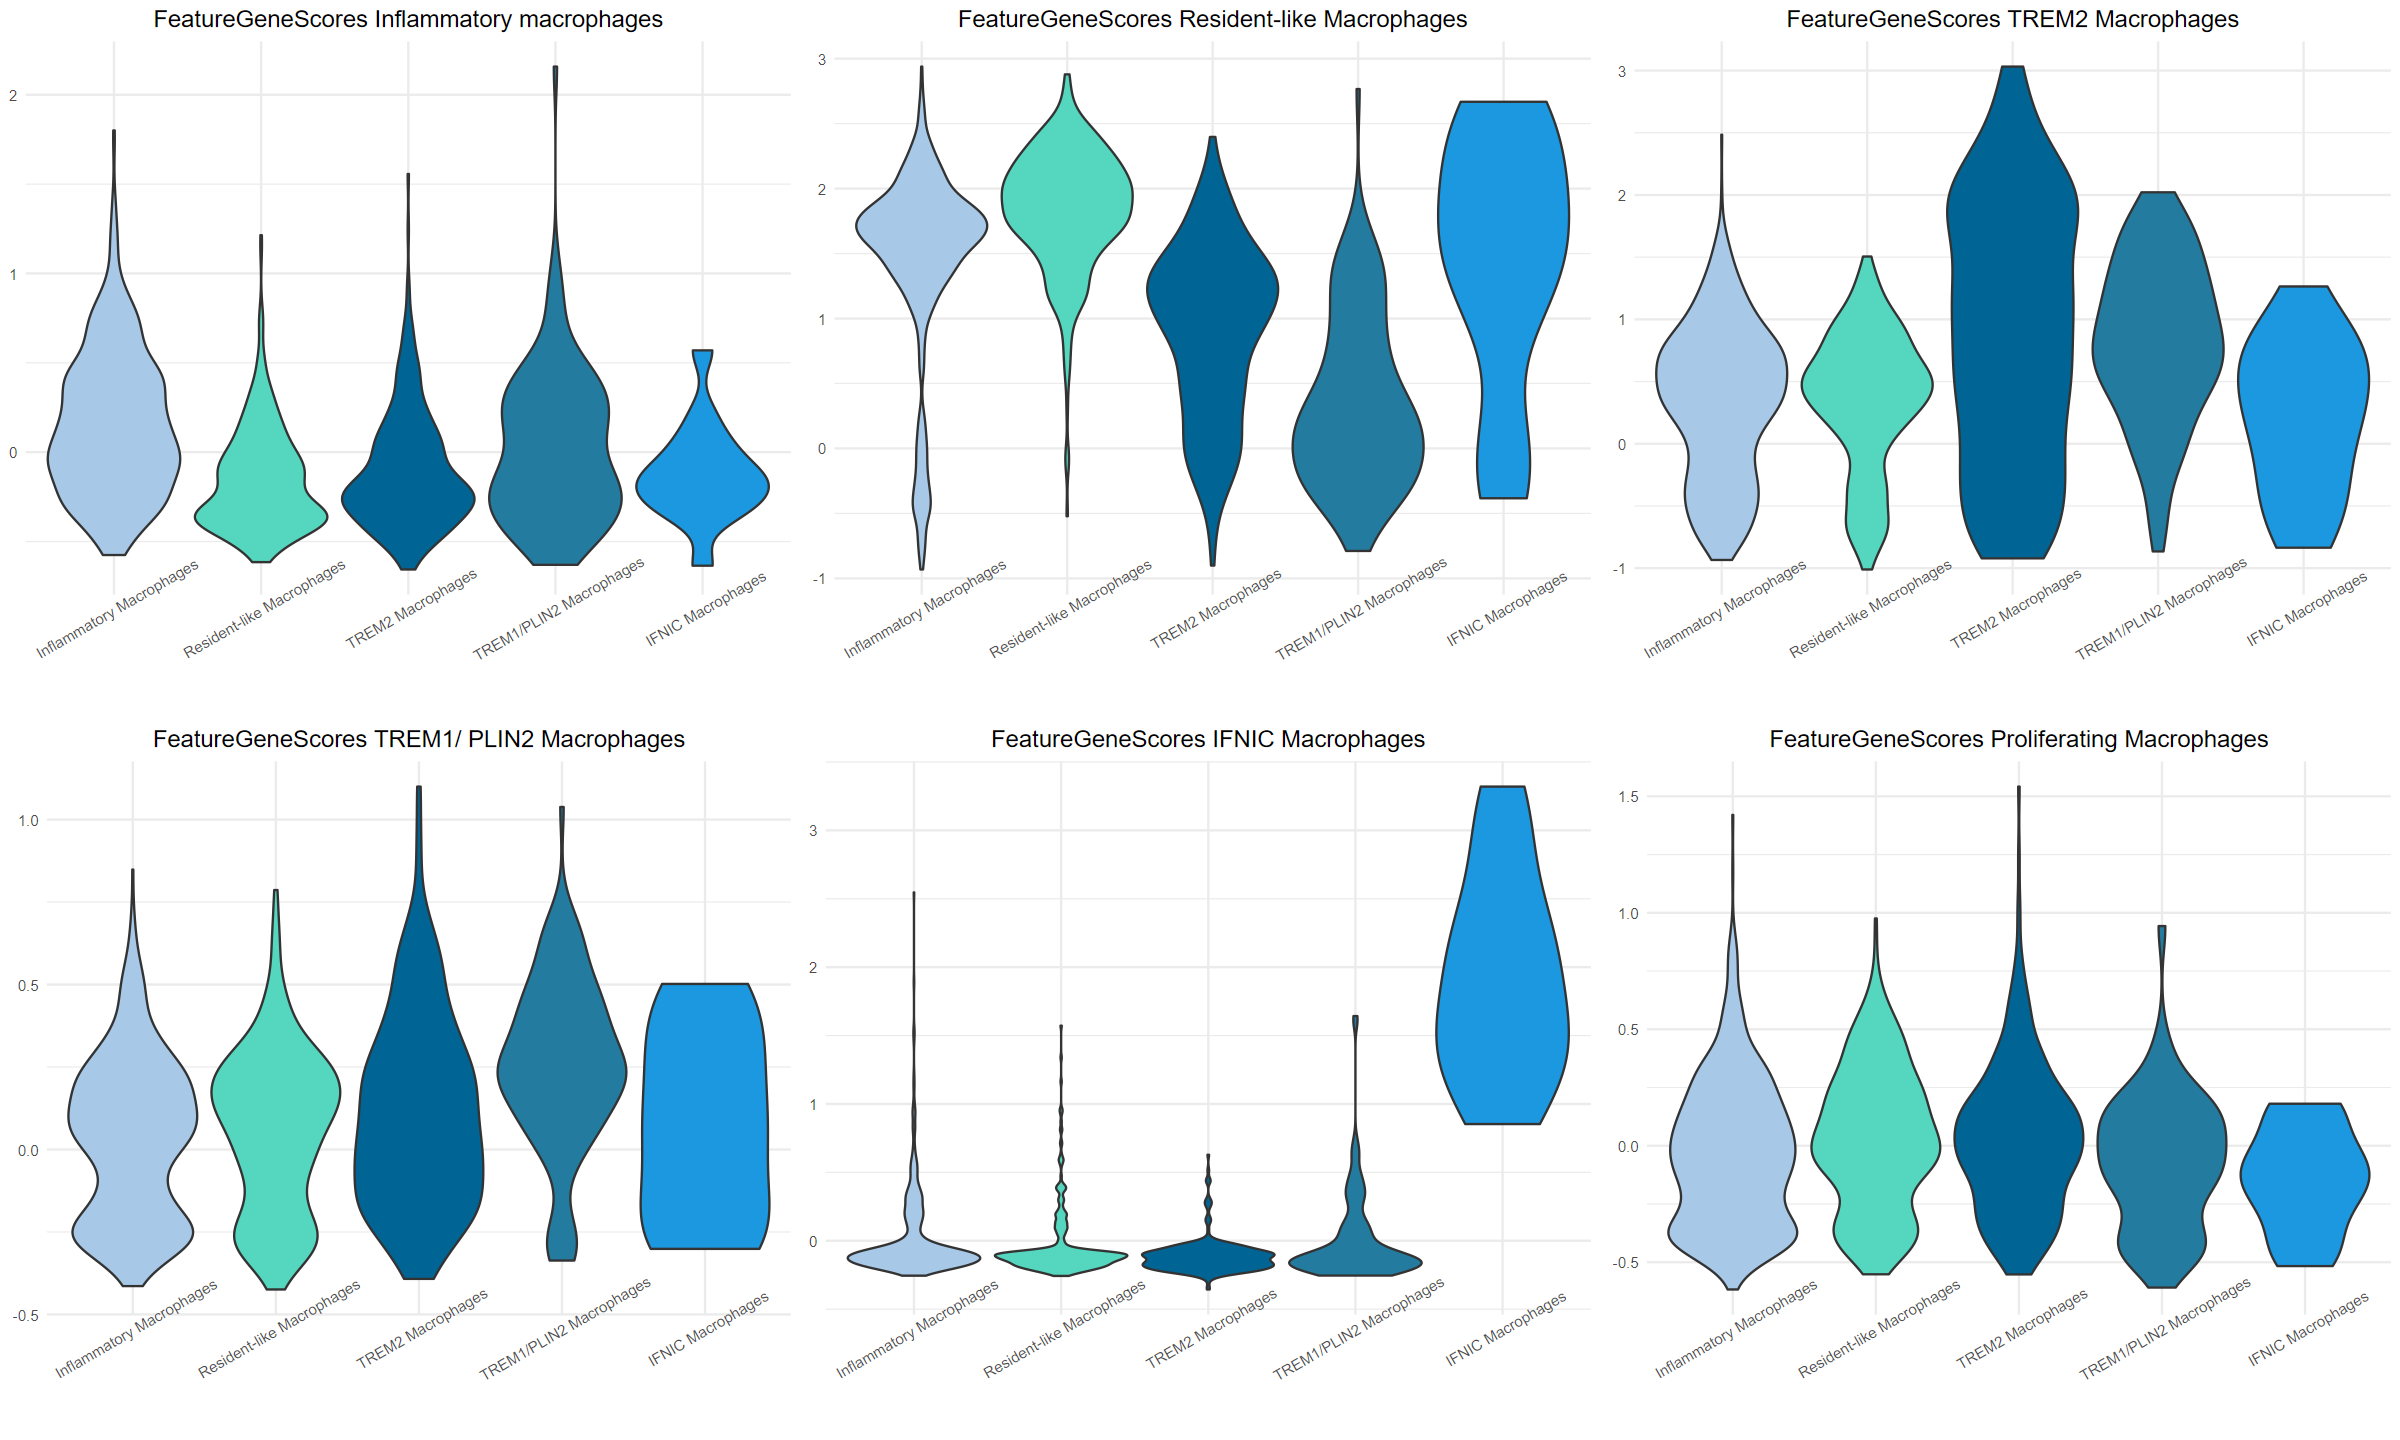

In [ ]:
# Violin plots of macrophage subtypes inflammatory, resident-like, LAMs, iLAMs, IFNICS, proliferating
#grid.arrange(inflammatory_dot, resident_dot, TREM2_dot, IFNIC_dot, proliferating_dot, ilam_dot, ncol = 2)
grid.arrange(inflammatory_vln, residents_vln, trem2_vln, ilam_vln, ifn_vln, proliferating_vln, ncol=3)

In [15]:
# Proportion tables
Percentage_cells <- prop.table(table(Idents(macrophages))) * 100

# Combine tables side by side
combined_df <- cbind(Percentage_cells)

# Print
combined_df

# Needs to be dataframe
Percentage_cells_df <- as.data.frame(Percentage_cells)
colnames(Percentage_cells_df) <- c("Celltype", "Percentage")

,Percentage_cells
Inflammatory Macrophages,43.237705
Resident-like Macrophages,26.502732
TREM2 Macrophages,21.448087
TREM1/PLIN2 Macrophages,7.786885
IFNIC Macrophages,1.024590


In [16]:
# Basic piechart
pie_chart_total <- ggplot(Percentage_cells_df, aes(x="", y=Percentage, fill=Celltype)) +
  geom_bar(stat="identity", width=1) +
  scale_fill_manual(values = colors ) +
  theme_minimal() +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank()) +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")),  
            position = position_stack(vjust = .5), 
            color = "black",
            size = 5) +
  coord_polar("y", start=0)

In [18]:
# Calculate the proportions as percentages
percentage_per_orig <- prop.table(table(Idents(macrophages), macrophages$orig.ident), 2) * 100

# Needs to be dataframe
percentage_per_orig_df <- as.data.frame(percentage_per_orig)
colnames(percentage_per_orig_df) <- c("Celltype", "Condition", "Percentage")

# Create a stacked bar plot
barplot_per_origin <- ggplot(percentage_per_orig_df, aes(x = Condition, y = Percentage, fill = Celltype), cols = colors) +
  geom_bar(stat = "identity") + 
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 0),
  ) +
  scale_fill_manual(values = colors )  # Rotate x-axis labels for better visibility


In [ ]:
# Get features of each subtype
features_combined <- c(
  features_inflammatory, 
  features_resident, 
  features_trem2, 
  features_ifnic, 
  features_proliferating, 
  features_ILAM
)

ERROR: Error: object 'features_inflammatory' not found


In [22]:
# Add a module score to the Seurat object
# Vln plots
inflammatory_vln <- VlnPlot(macrophages, features = features_combined, stack=TRUE, sort = TRUE) + 
  ggtitle("FeatureGeneScores") + theme_minimal() +  # Crop extreme values
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    legend.position = "none",
    axis.title.y = element_blank(),
    axis.title.x = element_blank()
  ) + ggtitle(NULL)
plot_grid(inflammatory_vln)

ERROR: Error: object 'features_combined' not found


In [ ]:
# Create dimplot of umap
umap_plot <- DimPlot(macrophages, reduction="umap", label = TRUE, cols = colors) +
theme (
    legend.position = "none"
)

In [ ]:
# Interesting features
features_plots <- c("Il1b", "S100a8", "Lyve1", "Trem2", "Plin2", "Irf7")

# Featureplot of some interesting markers
interesting_markers <- FeaturePlot(macrophages, reduction =  "umap", features = features_plots, ncol = 3)

In [ ]:
# Create heatmap
heatmap_markergenes <- DoHeatmap(macrophages, features = top10$gene, size=1, angle=0, raster=FALSE, group.colors = colors, label = FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white") & theme(legend.position= "none")

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tmem38b"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


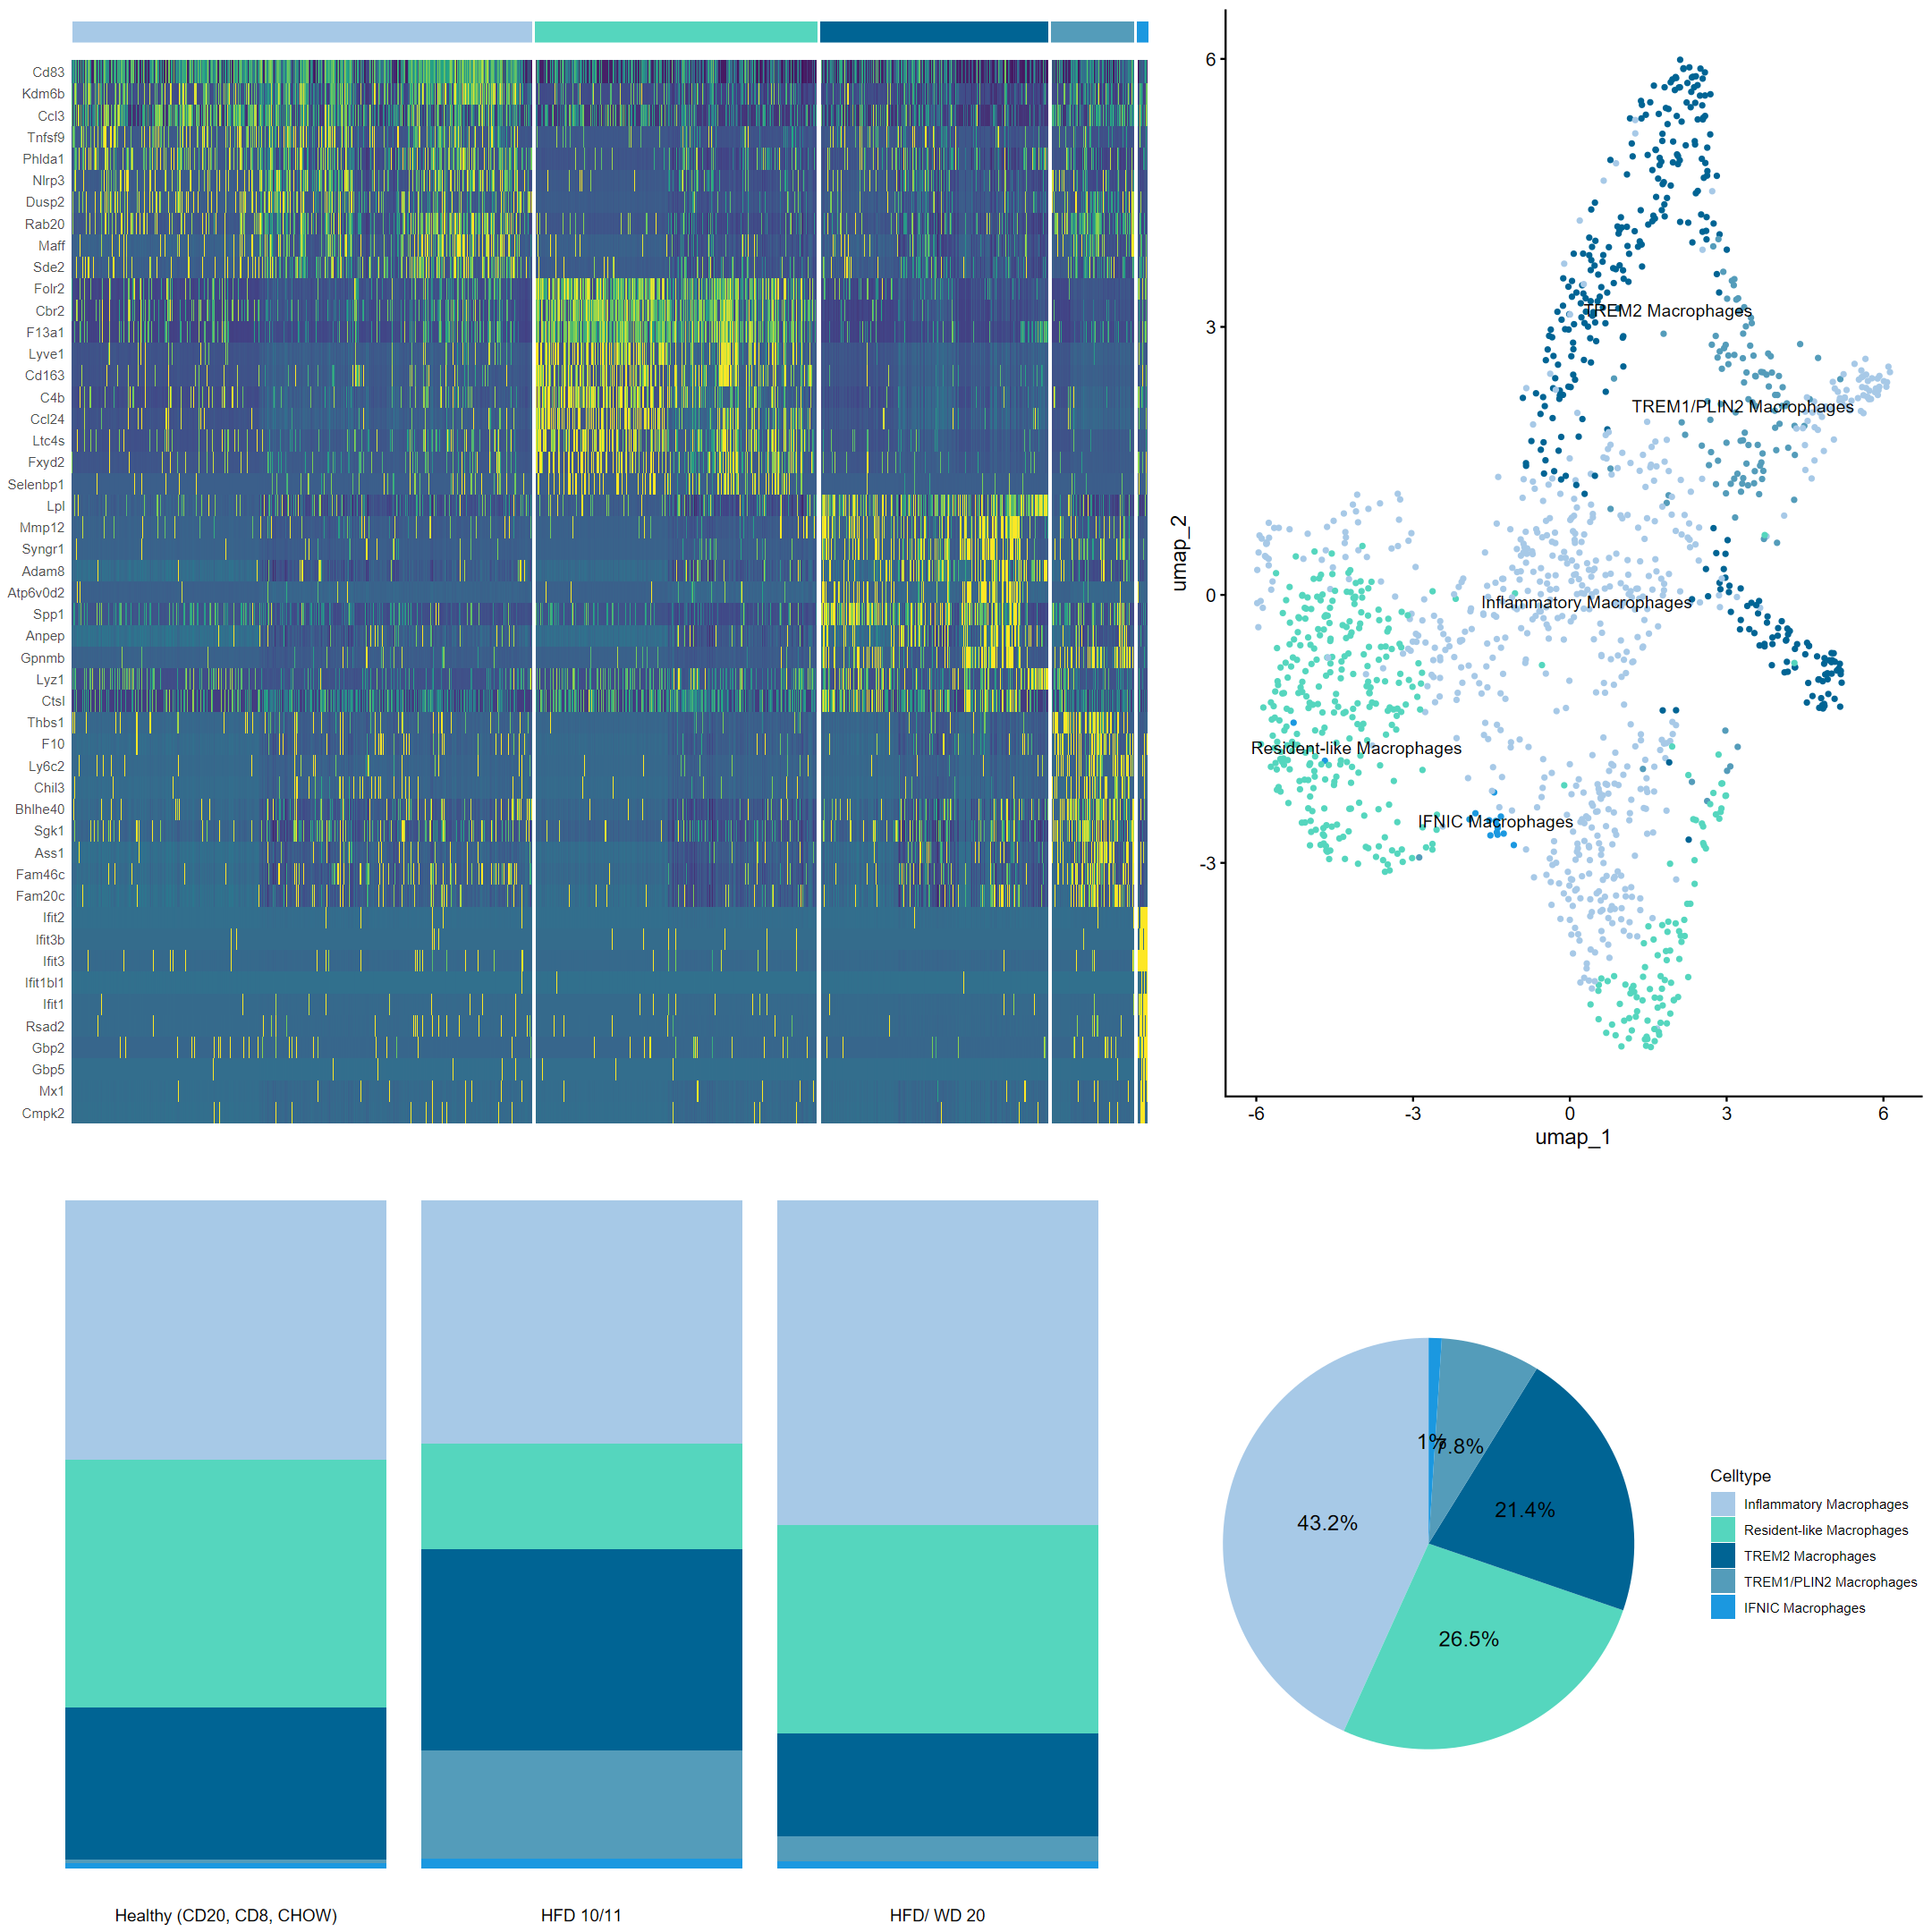

In [ ]:
# Define the layout matrix
layout_matrix <- rbind(
  c(4, 4, 4, 3, 3),
  c(4, 4, 4, 3, 3),
  c(4, 4, 4, 3, 3),
  c(1, 1, 1, 2, 2),
  c(1, 1, 1, 2, 2)
)

# Arrange the plots
grid.arrange(
  barplot_per_origin,  pie_chart_total,  umap_plot,  heatmap_markergenes,
  layout_matrix = layout_matrix
)

In [233]:
# Overrepresentation analysis
top_markers <- markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 
top_markers

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.043339e-51,1.615817,0.825,0.627,3.199086e-47,Inflammatory Macrophages,Cd83
3.177871e-26,1.472592,0.708,0.503,9.743989e-22,Inflammatory Macrophages,Ccl3
3.680306e-29,1.629631,0.534,0.296,1.128456e-24,Inflammatory Macrophages,Kdm6b
8.045771e-19,1.463673,0.449,0.255,2.466994e-14,Inflammatory Macrophages,Phlda1
4.302569e-15,1.542803,0.393,0.232,1.319254e-10,Inflammatory Macrophages,Rab20
1.072570e-20,1.853433,0.354,0.156,3.288714e-16,Inflammatory Macrophages,Tnfsf9
2.780463e-18,1.681471,0.354,0.172,8.525455e-14,Inflammatory Macrophages,Nlrp3
1.129170e-16,1.822504,0.319,0.155,3.462262e-12,Inflammatory Macrophages,Dusp2
1.019884e-10,1.458237,0.311,0.188,3.127170e-06,Inflammatory Macrophages,Sde2


In [232]:
# Overrepresentation analysis
top_markers <- markers %>% filter(cluster == "Inflammatory Macrophages") %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% arrange(cluster, desc(avg_log2FC))#%>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 
top_markers_names <- top_markers$gene
#entrez_markers <- bitr(top_markers_names, fromType="SYMBOL", toType=(c("ENTREZID","PATH","GO","ALIAS","GENENAME")), OrgDb="org.Mm.eg.db") # Code from bioconductor forum
# %>% filter(cluster == "Inflammatory Macrophages")
#GO_res <- enrichKEGG(gene = entrez_markers, organism = "mmu")

In [ ]:
# Tried a pathway analysis using fgsea
fgseaRes <- fgsea(pathways = examplePathways, 
                  stats    = exampleRanks,
                  minSize  = 15,
                  maxSize  = 500)

In [288]:
fgseaRes

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
1221633_Meiotic_Synapsis,5.241379e-01,7.012439e-01,0.06911985,0.2885754,0.9533068,27,"15270, 1...."
1445146_Translocation_of_Glut4_to_the_Plasma_Membrane,6.688852e-01,8.183021e-01,0.05571042,0.2387284,0.8650074,39,"17918, 1...."
442533_Transcriptional_Regulation_of_Adipocyte_Differentiation_in_3T3-L1_Pre-adipocytes,1.142857e-01,2.689616e-01,0.20429476,-0.3640706,-1.3455208,31,"76199, 1...."
508751_Circadian_Clock,7.903226e-01,8.833868e-01,0.05142649,0.2516324,0.7296318,17,"20893, 59027"
5334727_Mus_musculus_biological_processes,3.506098e-01,5.508239e-01,0.08359906,0.2469065,1.0554439,106,"60406, 1...."
573389_NoRC_negatively_regulates_rRNA_expression,4.175627e-01,6.071756e-01,0.08289621,0.3607407,1.0460016,17,"60406, 20018"
5990976_Assembly_of_the_pre-replicative_complex,1.447452e-04,1.631167e-03,0.51884808,0.5594313,2.1108436,49,"57441, 1...."
5990977_DNA_Replication_Pre-Initiation,1.904752e-06,3.600595e-05,0.64355184,0.5788464,2.3230903,63,"57441, 1...."
5990978_M_G1_Transition,1.904752e-06,3.600595e-05,0.64355184,0.5788464,2.3230903,63,"57441, 1...."


In [ ]:
# Tried KEGG analysis
kegg_geneset <- msigdbr(species = "mouse", category = "C2", subcategory = "KEGG")


In [261]:
# Get KEGG geneset
kegg_geneset <- msigdbr(species = "mouse", category = "C2", subcategory = "KEGG")

# Perform GSEA
fgsea_res <- fgsea(pathways = kegg_geneset, 
                       stats = rankings, 
                       minSize = 15, 
                       maxSize = 500,
                       scoreType = "pos")

ERROR: Error in .stopf("NAs in %s are not allowed", universeArg): NAs in names(stats) are not allowed


In [258]:
head(kegg_geneset)

gs_cat,gs_subcat,gs_name,gene_symbol,entrez_gene,ensembl_gene,human_gene_symbol,human_entrez_gene,human_ensembl_gene,gs_id,gs_pmid,gs_geoid,gs_exact_source,gs_url,gs_description,taxon_id,ortholog_sources,num_ortholog_sources
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca1,11303,ENSMUSG00000015243,ABCA1,19,ENSG00000165029,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|NCBI|OMA|OrthoDB|OrthoMCL|Panther|Treefam,11
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca12,74591,ENSMUSG00000050296,ABCA12,26154,ENSG00000144452,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|NCBI|OMA|OrthoDB|OrthoMCL|Panther|Treefam,11
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca13,268379,ENSMUSG00000004668,ABCA13,154664,ENSG00000179869,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|NCBI|OMA|OrthoDB|OrthoMCL|Panther|PhylomeDB|Treefam,12
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca2,11305,ENSMUSG00000026944,ABCA2,20,ENSG00000107331,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|NCBI|OMA|OrthoDB|OrthoMCL|Panther|PhylomeDB|Treefam,12
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca3,27410,ENSMUSG00000024130,ABCA3,21,ENSG00000167972,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|OMA|OrthoDB|OrthoMCL|Panther|Treefam,10
C2,CP:KEGG,KEGG_ABC_TRANSPORTERS,Abca4,11304,ENSMUSG00000028125,ABCA4,24,ENSG00000198691,M11911,,,hsa02010,http://www.genome.jp/kegg/pathway/hsa/hsa02010.html,ABC transporters,10090,EggNOG|Ensembl|HGNC|HomoloGene|Inparanoid|NCBI|OMA|OrthoDB|OrthoMCL|Panther|PhylomeDB|Treefam,12


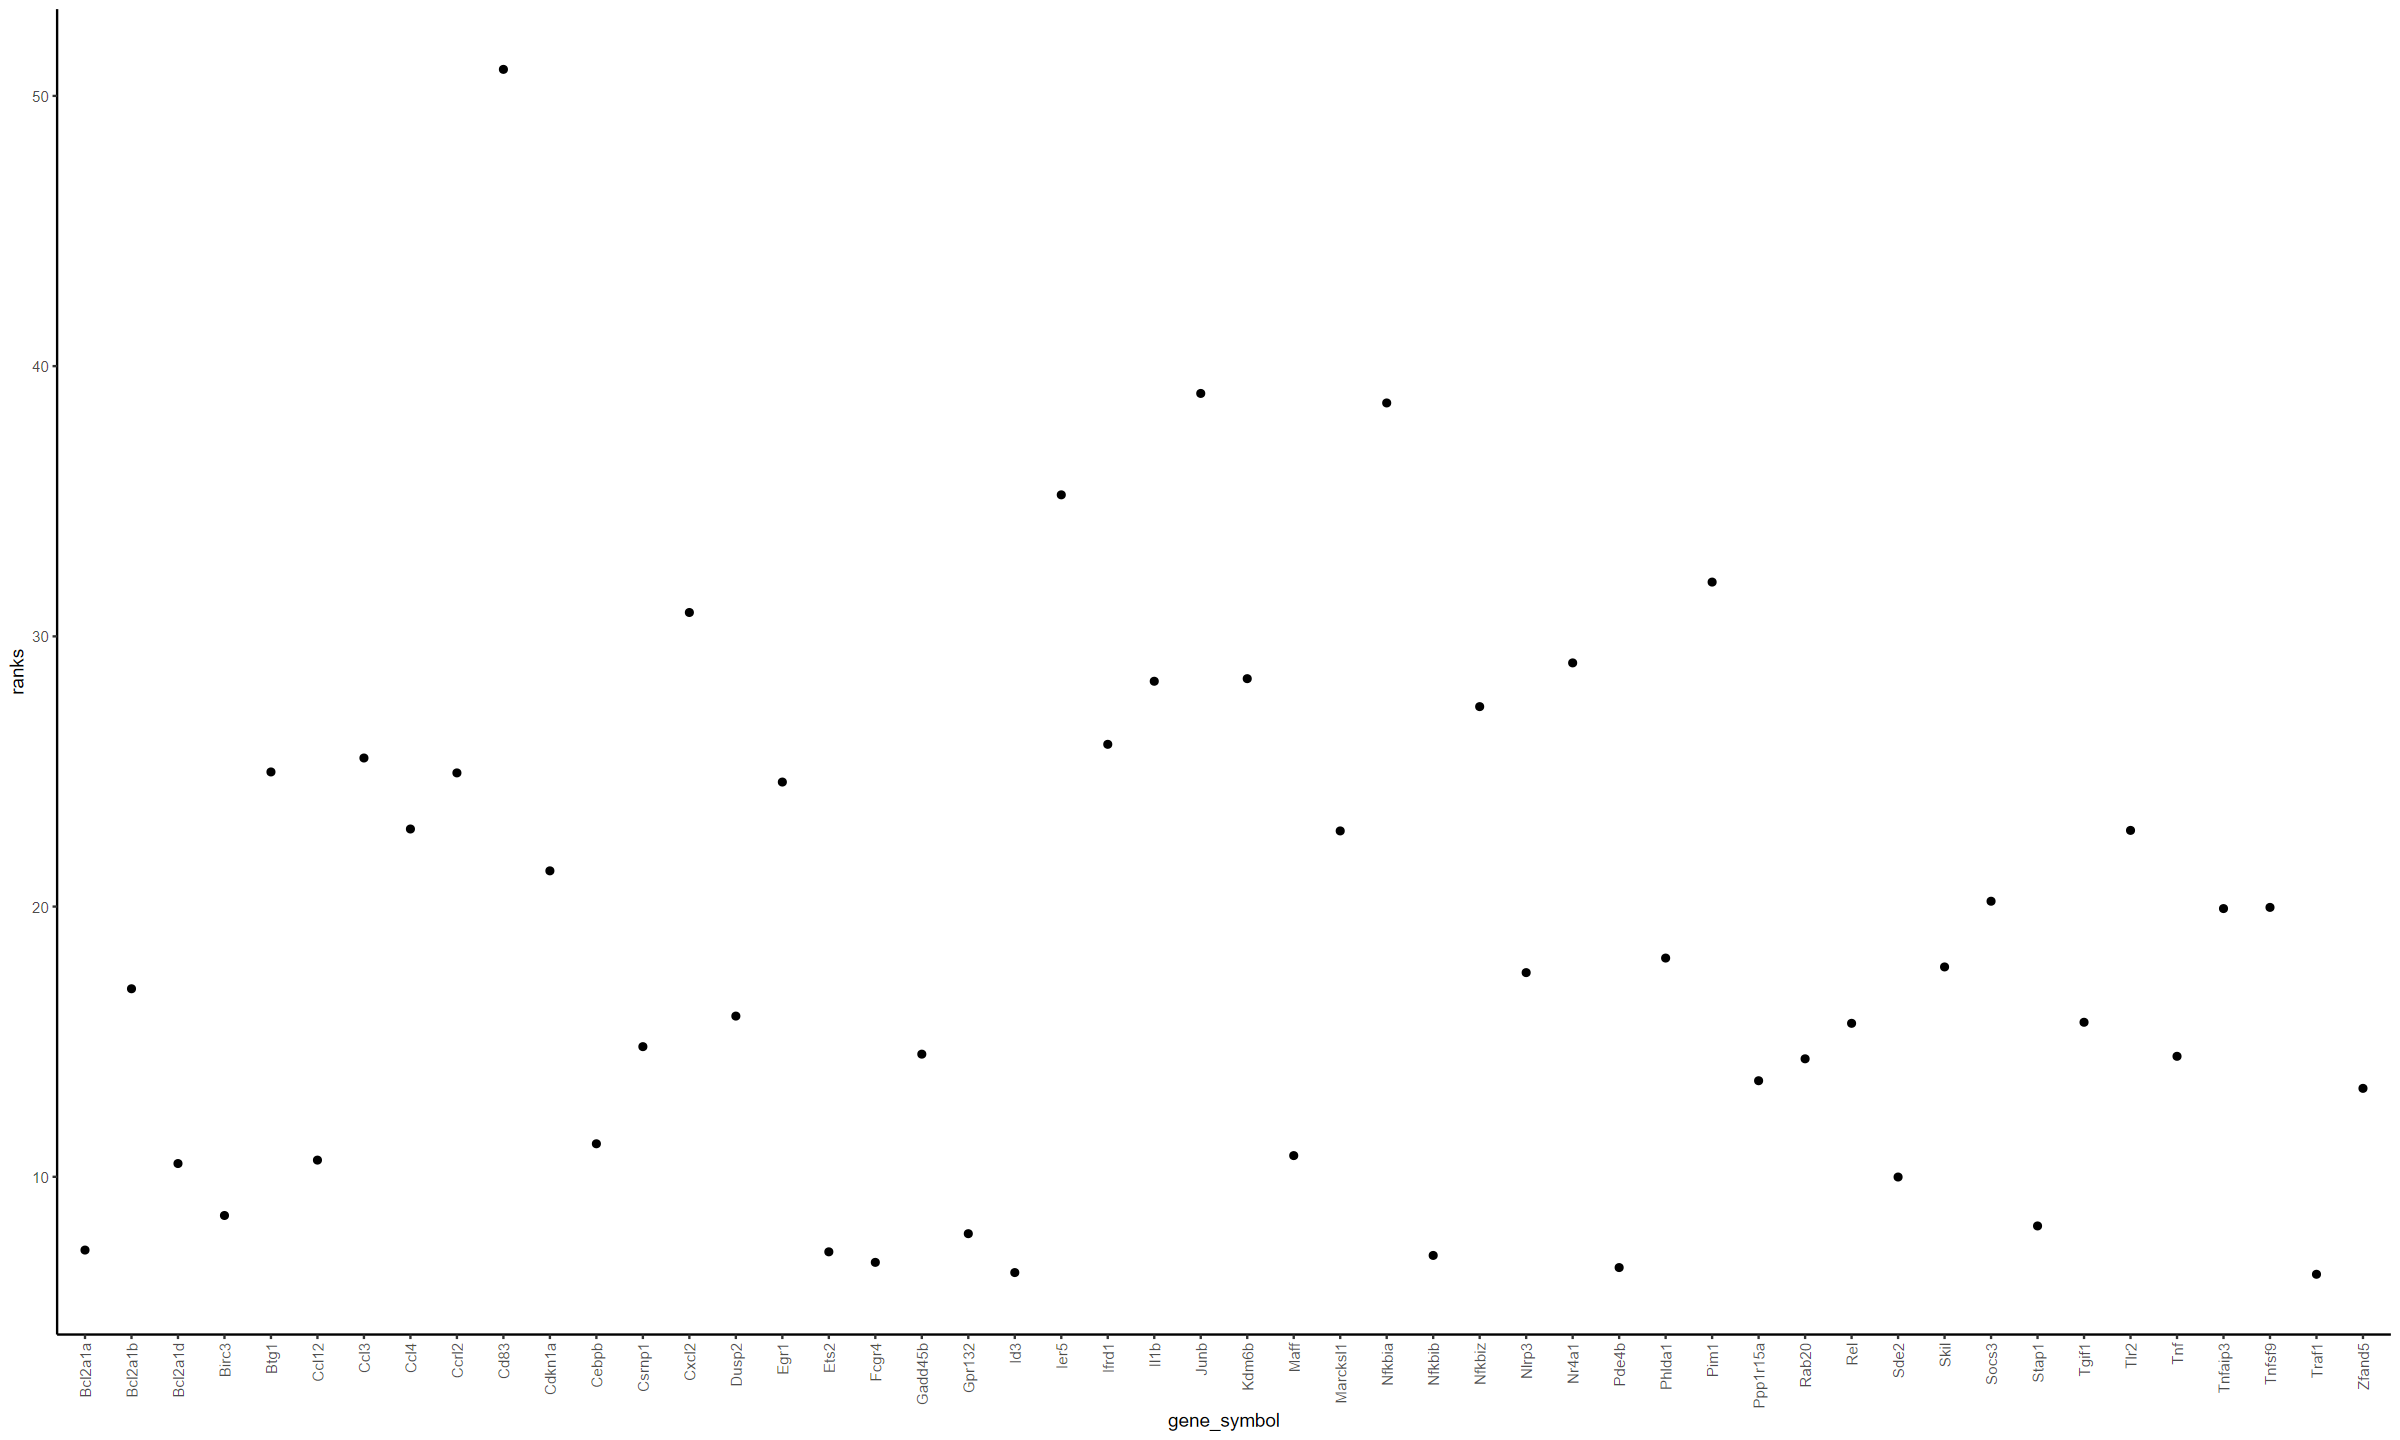

In [ ]:
# Plot the rankings of top genes
ggplot(data.frame(gene_symbol = names(rankings)[1:50], ranks = rankings[1:50]), aes(gene_symbol, ranks)) + 
	geom_point() +
	theme_classic() + 
	theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

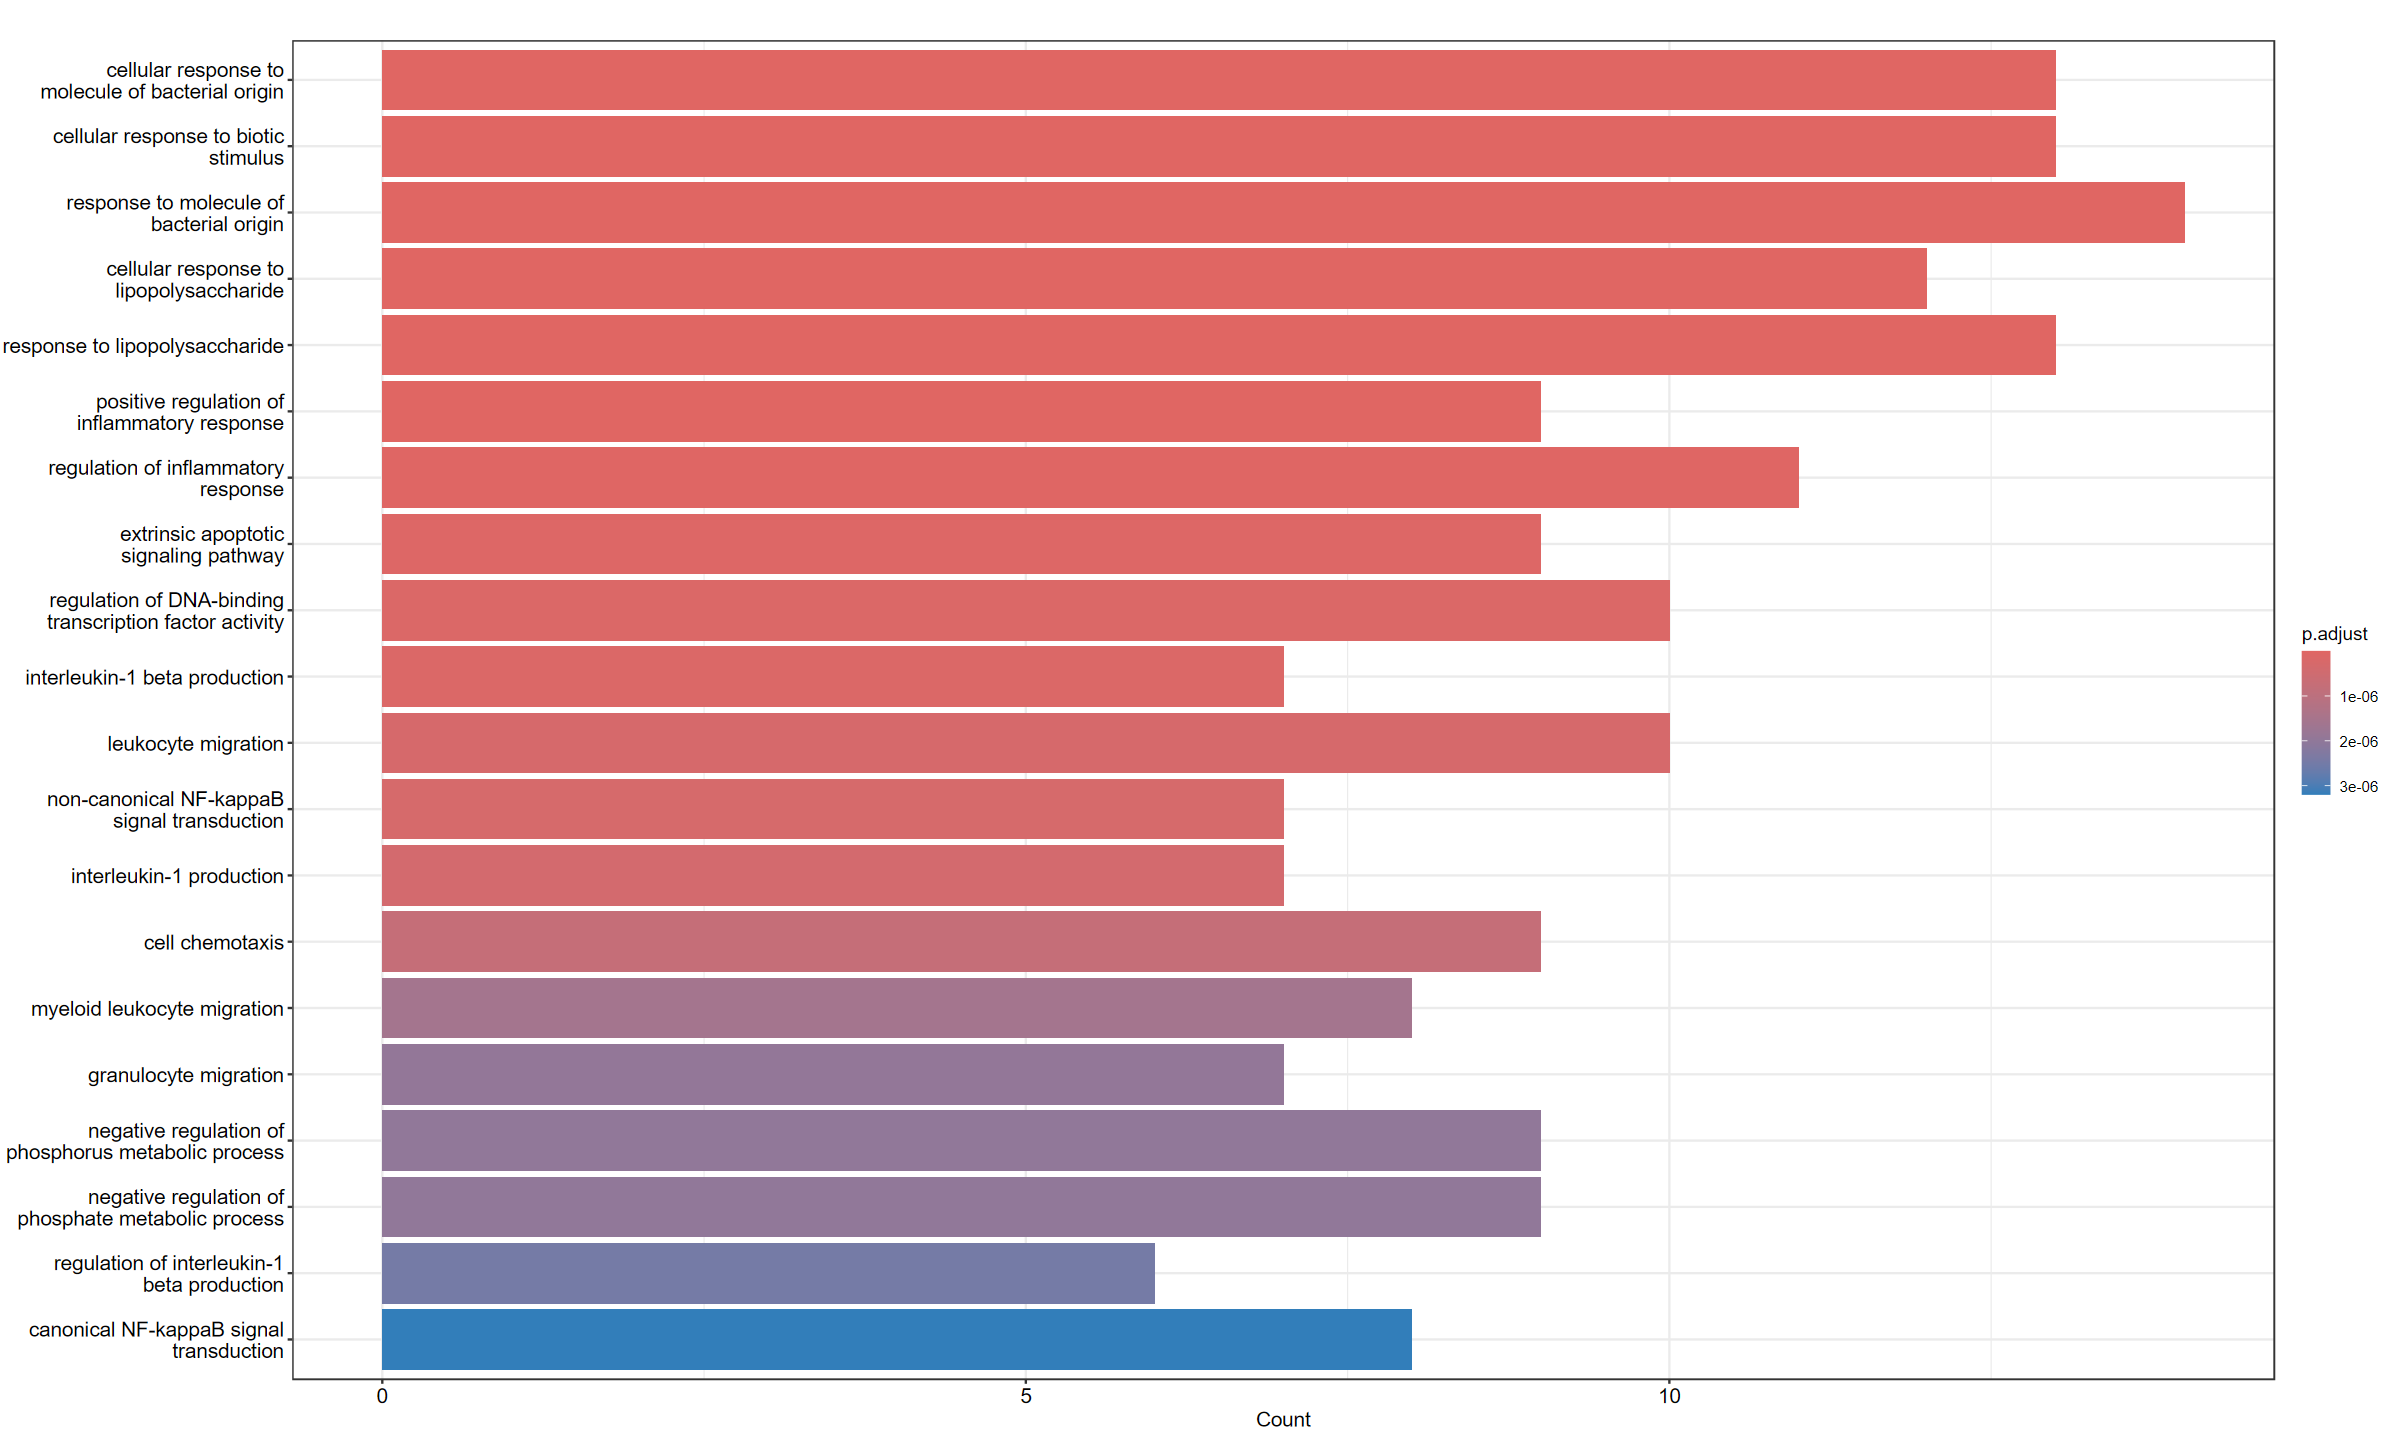

In [ ]:
# GO enrichment BP
GO_res <- enrichGO(gene = top_markers_names, OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
barplt_bp <- plot(barplot(GO_res, showCategory = 20))

# Plot barplot of BP
barplt_bp

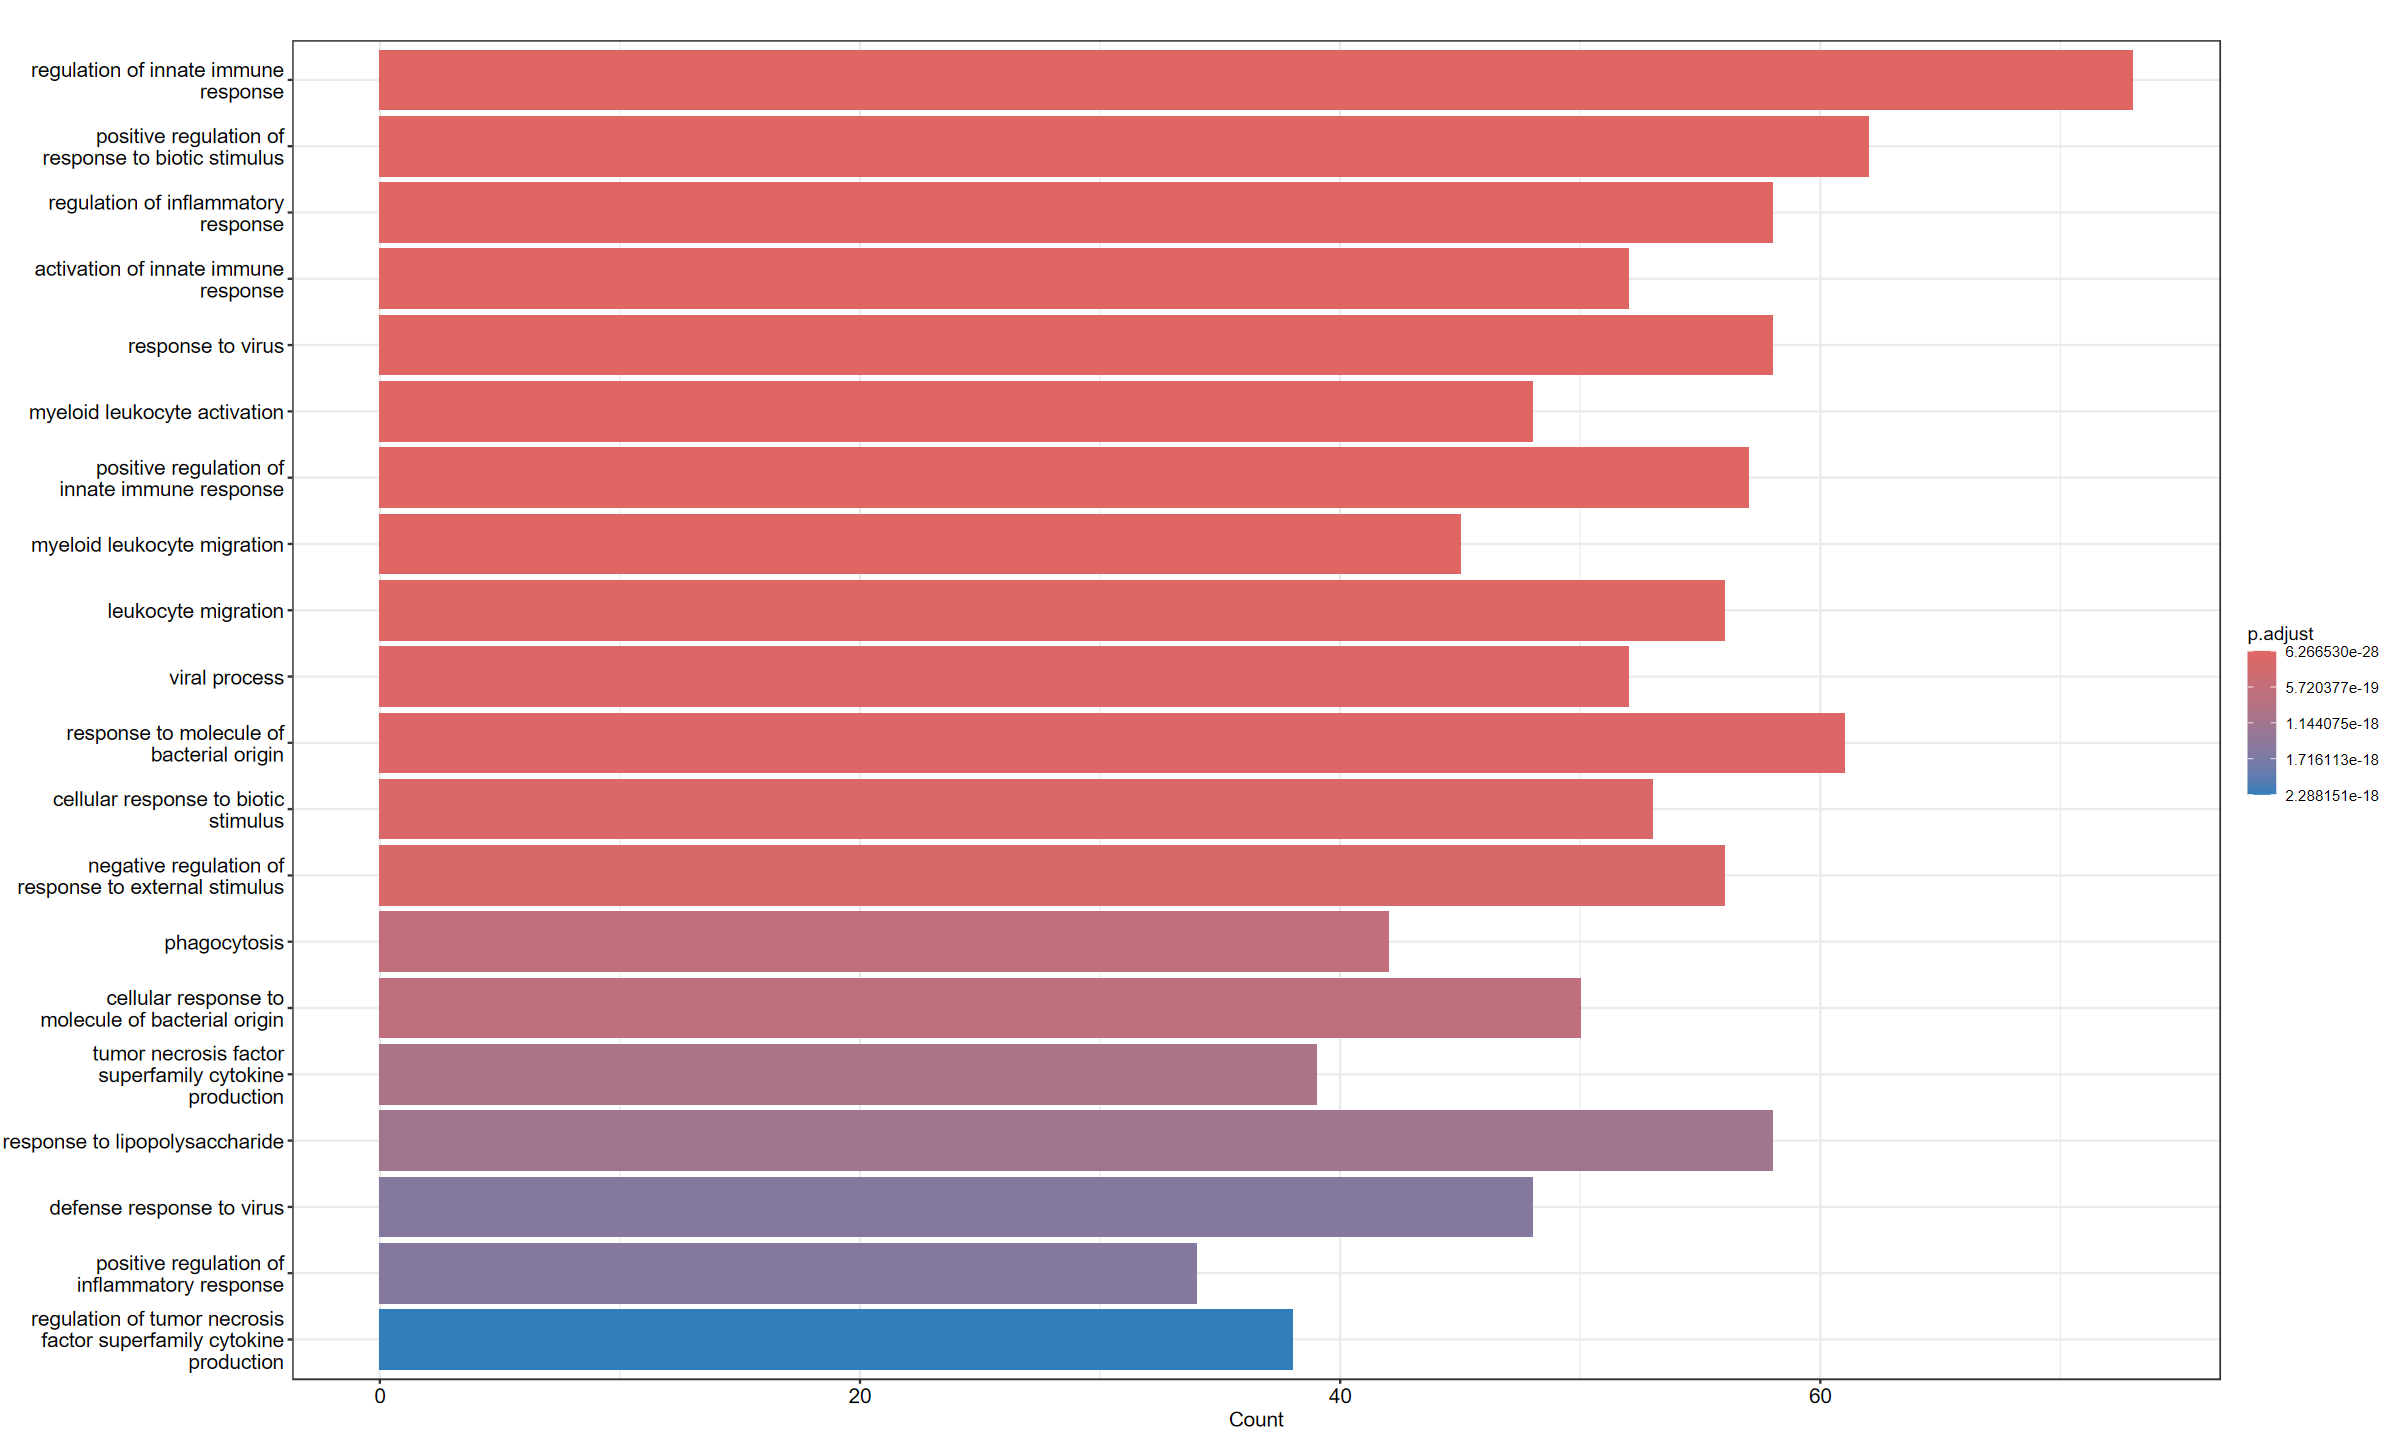

In [ ]:
# Barplot GO 
barplt <-  plot(barplot(GO_res, showCategory = 20))